<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.978 · TFM - Área 1</p>
<p style="margin: 0; text-align:right;">2022-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# TFM: Modelo predictivo de potenciales compradores de un e-commerce.

## Autor: Francesc Ballester Lecina

 <ol start="1">
  <li>Carga de librerías y bases de datos</li>
  <li>Exploración de datos
  <br>2.1 Datos Usuarios
  <br>2.2 Datos Sesiones
  <br>2.3 Datos Consumos
  <br>2.4 Datos Ventas
  <li>Transformación datos</li>
  <li>Correlaciones</li>
  <li>Balanceo de datos</li>
  <li>Modelos
  <br>6.1 Modelos de classificación (predicción clientes)
  <br>6.2 Modelo de classificación (predicción tipo de cliente)
</ol>

## 1. Carga de librerías y bases de datos

In [1]:
#Librerias procesamiento datos
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from collections import Counter
import warnings

#Librerias balanceo de datos
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#Libreria modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Libreria metricas
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

ruta = "/Users/francesc.ballester/Desktop/UOC/TFM/Datasets/"

In [2]:
#Carga de bases de datos
df_usuarios = pd.read_csv(ruta+"Linea1-Usuarios.txt", sep=';', encoding='latin-1')
df_sesiones = pd.read_csv(ruta+"Linea1-Sesiones.txt", sep=';', encoding='latin-1')
df_consumos = pd.read_csv(ruta+"Linea1-Consumos.txt", sep=';', encoding='latin-1')
df_ventas = pd.read_csv(ruta+"Linea1-Ventas.txt", sep=';', encoding='latin-1')

## 2. Exploración de datos

### 2.1. Datos usuarios

In [3]:
df_usuarios.head()

,IDUSUARIO,TIPOUSUARIO,FEC_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO,FEC_CLIENTE
0,"7668403,00",PF,14/3/2019 0:00:00,3.0,0,gmail.com,20,NaN,NaN,NaN,NaN,NaN,NaN
1,"7667922,00",PF,14/3/2019 0:00:00,2.0,0,hotmail.com,20,NaN,NaN,NaN,NaN,NaN,NaN
2,"7721206,00",PJ,10/4/2019 0:00:00,4.0,0,ilc.com.co,20,NaN,NaN,NaN,NaN,CALDAS,NaN
3,"7667953,00",PJ,14/3/2019 0:00:00,3.0,0,gmail.com,20,EMPRESARIO INDIVIDUAL,MC,M7110,ACTIVA,BOGOTA,NaN
4,"7667971,00",PJ,14/3/2019 0:00:00,3.0,0,acadia.com.co,20,SOCIEDAD COMERCIAL/INDUSTRIAL,PQ,L6810,ACTIVA,BOGOTA,NaN


In [4]:
#Tipo valores variables
print(df_usuarios.dtypes)
df_usuarios['IDUSUARIO'] = df_usuarios['IDUSUARIO'].replace(',00','', regex=True).astype(int)
total_usuarios = len(df_usuarios.index)

IDUSUARIO            object
TIPOUSUARIO          object
FEC_REGISTRO         object
CANAL_REGISTRO      float64
IND_CLIENTE           int64
TIPOEMAIL            object
BONDAD_EMAIL          int64
USU_TIPO             object
USU_TAMANIO          object
USU_CIIU             object
USU_ESTADO           object
USU_DEPARTAMENTO     object
FEC_CLIENTE          object
dtype: object


In [5]:
#Comprobación valores nulos
df_usuarios.isnull().sum()

IDUSUARIO                0
TIPOUSUARIO              0
FEC_REGISTRO             0
CANAL_REGISTRO        3521
IND_CLIENTE              0
TIPOEMAIL                0
BONDAD_EMAIL             0
USU_TIPO            109428
USU_TAMANIO         109427
USU_CIIU            109427
USU_ESTADO          109427
USU_DEPARTAMENTO    106789
FEC_CLIENTE         140127
dtype: int64

### 2.1.1 Tratamiento valores nulos usuarios

In [6]:
#Tratamiento valores nulos CANAL REGISTRO
df_usuarios['CANAL_REGISTRO'].fillna(0,inplace=True)
df_usuarios['CANAL_REGISTRO'] = df_usuarios['CANAL_REGISTRO'].astype(int)

#Asignamos nombre al CANAL REGISTRO
df_usuarios.loc[df_usuarios['CANAL_REGISTRO'] == 0, 'CANAL_REGISTRO'] = 'Otros'
df_usuarios.loc[df_usuarios['CANAL_REGISTRO'] == 1, 'CANAL_REGISTRO'] = 'SEM'
df_usuarios.loc[df_usuarios['CANAL_REGISTRO'] == 4, 'CANAL_REGISTRO'] = 'SEO'
df_usuarios.loc[df_usuarios['CANAL_REGISTRO'] == 2, 'CANAL_REGISTRO'] = 'Directorios populares'
df_usuarios.loc[df_usuarios['CANAL_REGISTRO'] == 3, 'CANAL_REGISTRO'] = 'Directorios populares'
df_usuarios.loc[df_usuarios['CANAL_REGISTRO'] == 7, 'CANAL_REGISTRO'] = 'Directorios populares'
df_usuarios.loc[df_usuarios['CANAL_REGISTRO'] == 6, 'CANAL_REGISTRO'] = 'Directorios especializados'
df_usuarios.loc[df_usuarios['CANAL_REGISTRO'] == 8, 'CANAL_REGISTRO'] = 'Directorios especializados'
df_usuarios.loc[df_usuarios['CANAL_REGISTRO'] == 9, 'CANAL_REGISTRO'] = 'Directorios especializados'

#Corregimos aquellos TIPOUSUARIO que no son correctos
variable_tipo_usu = ['PF','PX']
for variable in variable_tipo_usu:
        df_usuarios.loc[(df_usuarios["TIPOUSUARIO"] == variable) &
                        (df_usuarios["USU_TIPO"].notnull()) &
                        (df_usuarios["USU_TAMANIO"].notnull()) &
                        (df_usuarios["USU_CIIU"].notnull()) &
                        (df_usuarios["USU_ESTADO"].notnull()) &
                        (df_usuarios["USU_DEPARTAMENTO"].notnull())
                         , 'TIPOUSUARIO'] = 'PJ'
        
#Tratamiento valores nulos USU_TIPO
df_usuarios.loc[(df_usuarios["TIPOUSUARIO"] == "PF") & (df_usuarios['USU_TIPO'].isnull()), 'USU_TIPO'] = 'PN'
df_usuarios.loc[(df_usuarios["TIPOUSUARIO"] == "PJ") & (df_usuarios['USU_TIPO'].isnull()), 'USU_TIPO'] = 'PJ'
df_usuarios.loc[(df_usuarios["TIPOUSUARIO"] == "PX") & (df_usuarios['USU_TIPO'].isnull()), 'USU_TIPO'] = 'PX'

#Tratamiento valores nulos TIPOUSUARIO=PJ
df_usuarios.loc[(df_usuarios["USU_TIPO"] == "PJ") & (df_usuarios['USU_TAMANIO'].isnull()), 'USU_TAMANIO'] = 'SD'

#Trataiemnto valores nulos USU_CIIU, USU_ESTADO, USU_DEPARTAMENTO para TIPOUSUARIO=PJ
variables_pj = ['USU_CIIU','USU_ESTADO','USU_DEPARTAMENTO']
for variable in variables_pj:
    df_usuarios.loc[(df_usuarios["TIPOUSUARIO"] == "PJ") & (df_usuarios[variable].isnull()), variable] = 'DESCONOCIDO'
    
#Comprobación valores nulos
df_usuarios.isnull().sum()

IDUSUARIO                0
TIPOUSUARIO              0
FEC_REGISTRO             0
CANAL_REGISTRO           0
IND_CLIENTE              0
TIPOEMAIL                0
BONDAD_EMAIL             0
USU_TIPO                 0
USU_TAMANIO         106606
USU_CIIU            106606
USU_ESTADO          106606
USU_DEPARTAMENTO    106606
FEC_CLIENTE         140127
dtype: int64

In [7]:
#Agrupamos aquellos valores que representan <1% de la muestra y lo agrupamos en el valor 'OTROS'
df_usuarios_cat = ['TIPOUSUARIO','CANAL_REGISTRO','IND_CLIENTE','BONDAD_EMAIL','USU_TIPO', 'USU_TAMANIO', 'USU_CIIU', 'USU_ESTADO', 'USU_DEPARTAMENTO']

for variable in df_usuarios_cat:
    if len(df_usuarios.loc[df_usuarios[variable].notna()]) < total_usuarios:
        data_filtrado = df_usuarios.loc[df_usuarios[variable].notna()]
        total_notna = len(data_filtrado)
        freq = data_filtrado[variable].value_counts()/total_notna
        data_preproces = freq.to_frame('perc').reset_index()
        categorias = list(data_preproces.loc[data_preproces['perc']<0.01]['index'])
        for cat in categorias:
            df_usuarios.loc[df_usuarios[variable] == cat, variable] = 'OTROS'

### 2.1.2. Descripción usuarios

PF    101752
PJ     36130
PX      4854
Name: TIPOUSUARIO, dtype: int64


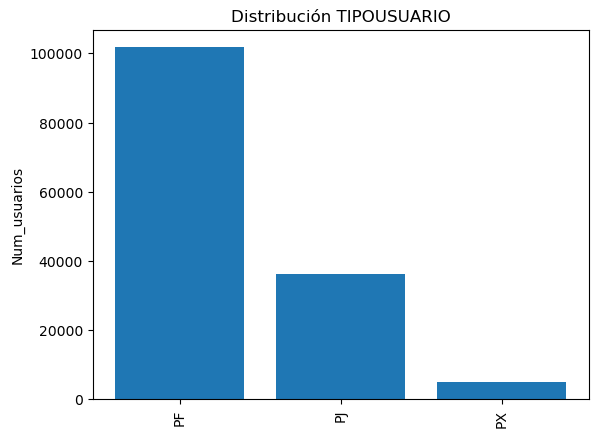

Directorios populares         75780
SEM                           29196
Directorios especializados    20693
SEO                           13546
Otros                          3521
Name: CANAL_REGISTRO, dtype: int64


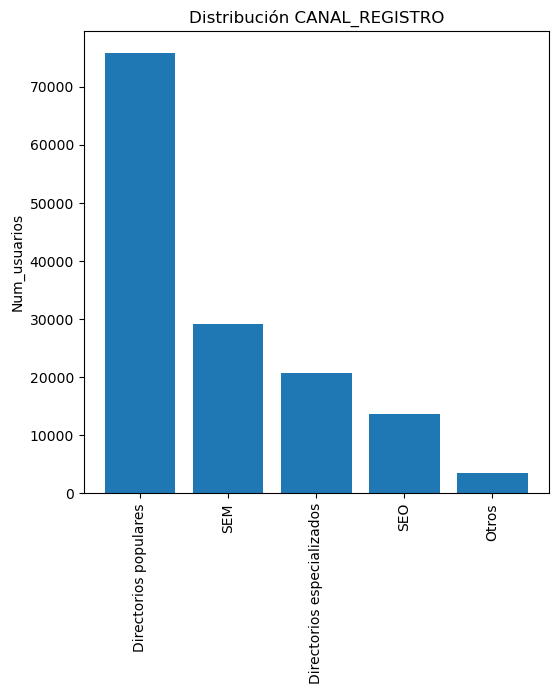

0    140121
1      2615
Name: IND_CLIENTE, dtype: int64


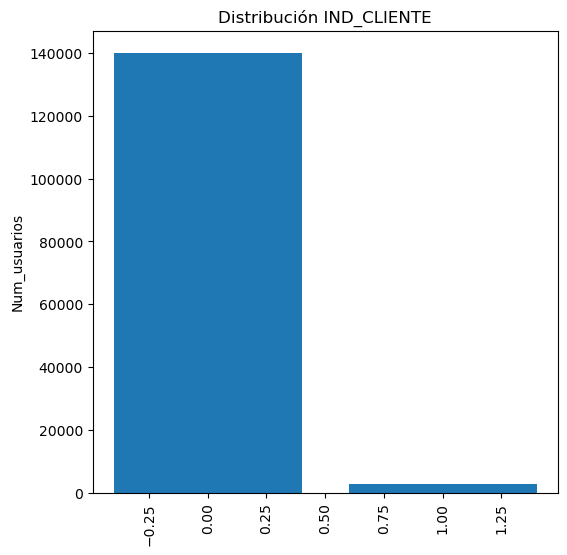

 20    99024
 0     26499
-10     9458
-20     3893
 9      1996
 1      1866
Name: BONDAD_EMAIL, dtype: int64


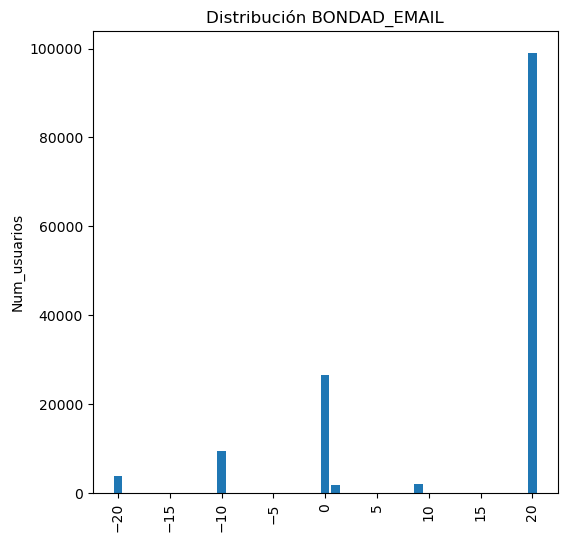

PN                                 101752
SOCIEDAD COMERCIAL/INDUSTRIAL       16021
EMPRESARIO INDIVIDUAL               14635
PX                                   4854
PJ                                   2822
ENTIDAD FINANCIERA O DE SEGUROS      1063
ENTIDAD SIN ANIMO DE LUCRO           1011
ORGANISMO ESTATAL                     262
HOLDING                               177
ENTIDAD EXTRANJERA                    132
SOCIEDAD NO COMERCIAL                   5
INDUSTRIA / COMERCIO                    2
Name: USU_TIPO, dtype: int64


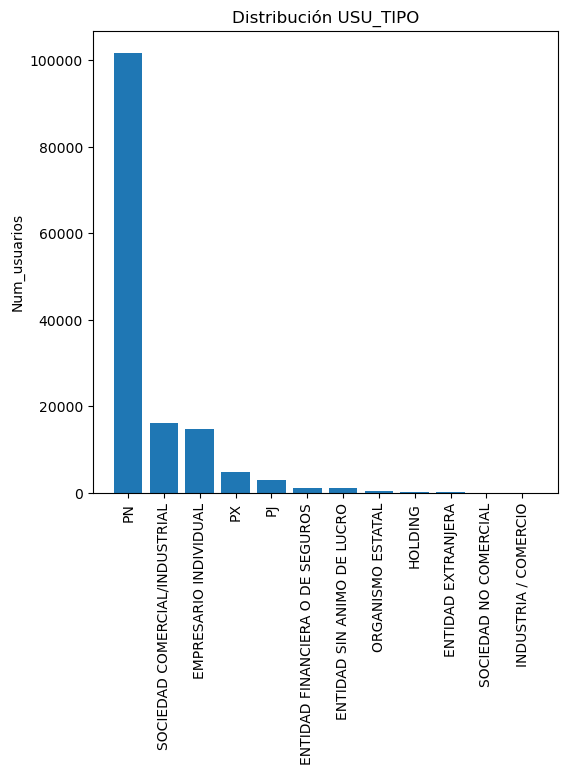

MC    23096
PQ     4387
SD     3511
MD     2612
GR     2524
Name: USU_TAMANIO, dtype: int64


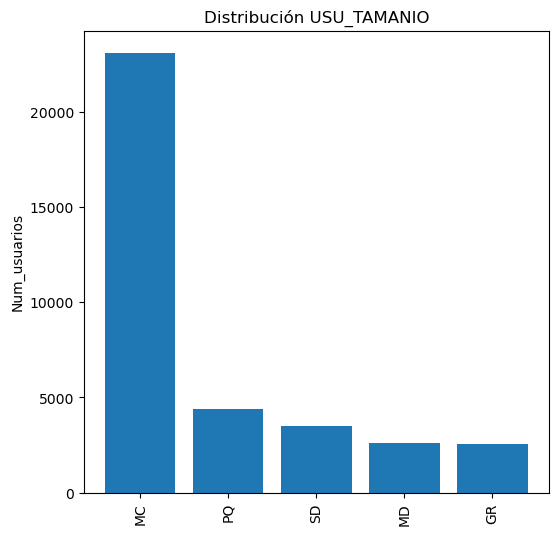

OTROS          20963
DESCONOCIDO     2821
G4711            927
M7110            808
M7020            789
I5611            706
N8299            685
G4771            595
F4290            578
G4773            569
I5630            556
S9499            555
G4752            501
G4719            479
H4923            466
L6810            458
C1410            447
M7310            443
S9602            429
G4659            423
K6621            419
G4530            394
M6910            377
G4663            372
F4111            370
Name: USU_CIIU, dtype: int64


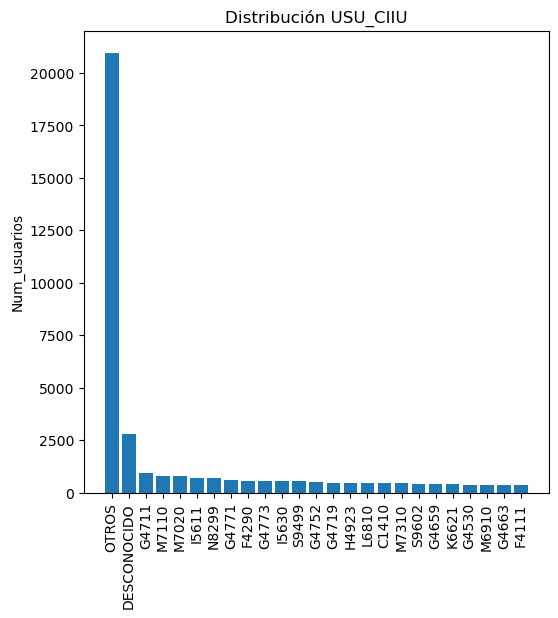

ACTIVA         26726
CANCELACIÓN     5109
DESCONOCIDO     2821
LIQUIDACION     1004
OTROS            470
Name: USU_ESTADO, dtype: int64


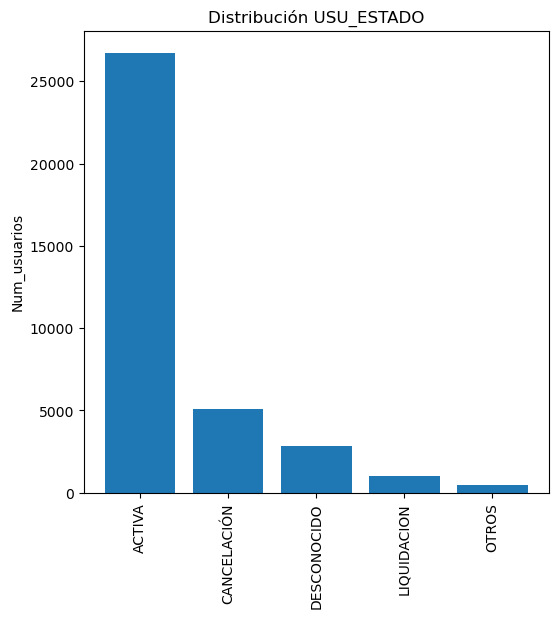

BOGOTA             14168
ANTIOQUIA           4366
VALLE               2898
OTROS               2103
CUNDINAMARCA        1941
ATLANTICO           1665
SANTANDER           1486
RISARALDA            876
BOLIVAR              836
BOYACA               810
NORTE SANTANDER      741
META                 687
HUILA                662
TOLIMA               601
NARINO               529
CALDAS               523
CAUCA                417
CESAR                416
MAGDALENA            405
Name: USU_DEPARTAMENTO, dtype: int64


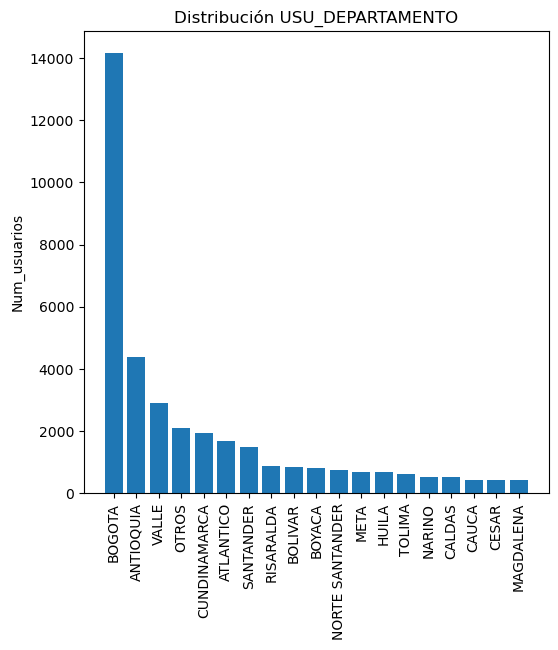

In [8]:
#Distribución usuarios por cada variable
for variable in df_usuarios_cat:
    freq = df_usuarios[variable].value_counts()
    print(freq)
    plt.bar(freq.index.values, freq)
    plt.xticks(rotation=90)
    plt.ylabel('Num_usuarios')
    plt.title("Distribución "+variable);
    plt.rcParams['figure.figsize']=(6,6)
    plt.show()

- El conjunto de usuarios está formado mayormente por personas físicas (PF).
- El 73,5% de los usuarios se han registrado a través de directorios populares (53,1%), y SEM (20,4%).
- Del total de usuarios registrados en el e-commerce solo un 2% son clientes.
- El 70% de los correos registrados son correctos.
- El perfil de usuarios tipo PJ que tenemos en nuestra base de datos son empresas son medianas y pequeñas empresas, activas con sede en Bogotá.

#### 2.1.3. Comparación usuarios vs. clientes

PF    100583
PJ     34821
PX      4717
Name: TIPOUSUARIO, dtype: int64


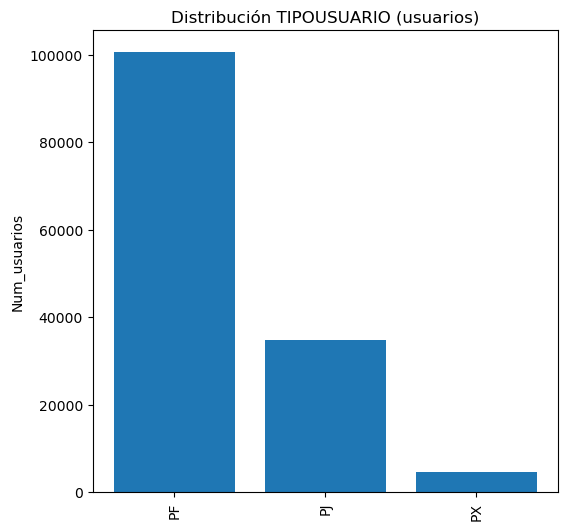

PJ    1309
PF    1169
PX     137
Name: TIPOUSUARIO, dtype: int64


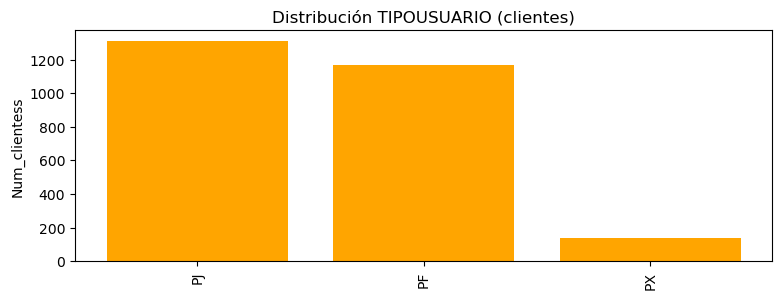

Directorios populares         74380
SEM                           28613
Directorios especializados    20359
SEO                           13269
Otros                          3500
Name: CANAL_REGISTRO, dtype: int64


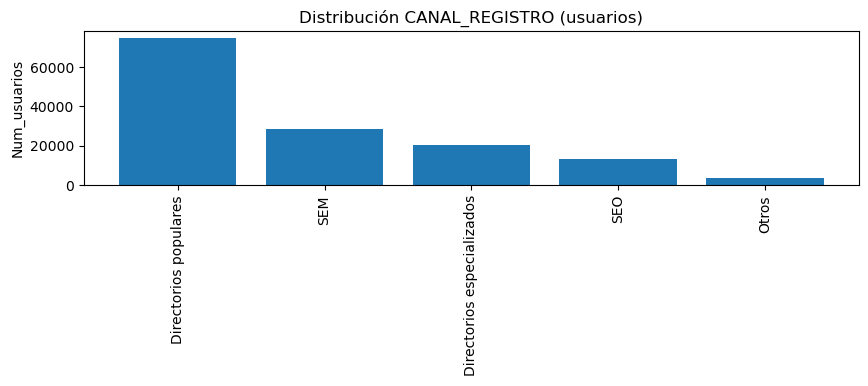

Directorios populares         1400
SEM                            583
Directorios especializados     334
SEO                            277
Otros                           21
Name: CANAL_REGISTRO, dtype: int64


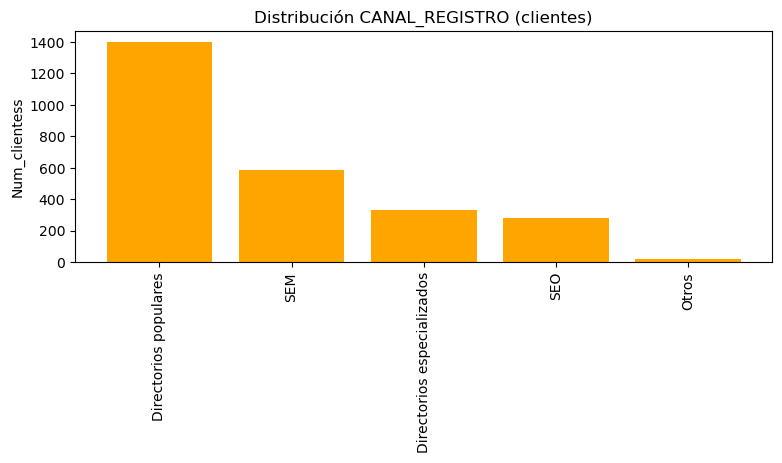

 20    96585
 0     26432
-10     9441
-20     3858
 9      1966
 1      1839
Name: BONDAD_EMAIL, dtype: int64


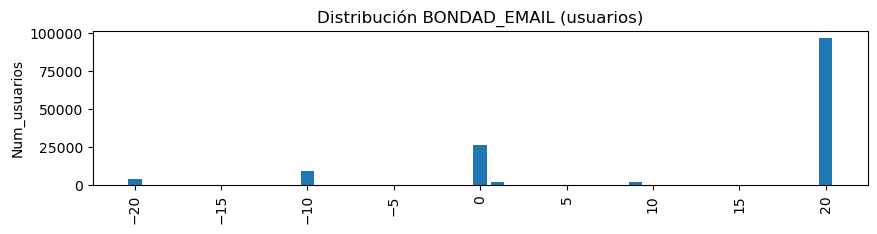

 20    2439
 0       67
-20      35
 9       30
 1       27
-10      17
Name: BONDAD_EMAIL, dtype: int64


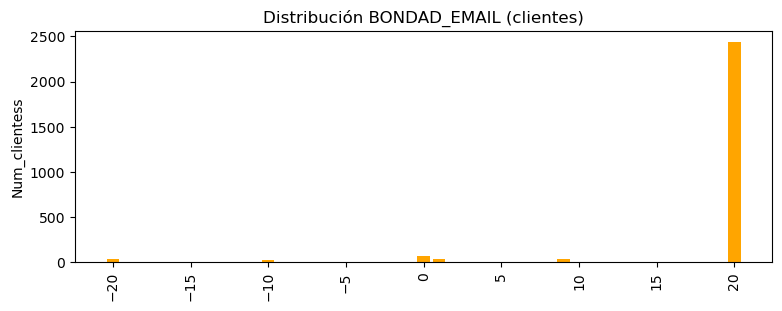

PN                                 100583
SOCIEDAD COMERCIAL/INDUSTRIAL       15054
EMPRESARIO INDIVIDUAL               14439
PX                                   4717
PJ                                   2776
ENTIDAD FINANCIERA O DE SEGUROS      1019
ENTIDAD SIN ANIMO DE LUCRO            983
ORGANISMO ESTATAL                     261
HOLDING                               165
ENTIDAD EXTRANJERA                    117
SOCIEDAD NO COMERCIAL                   5
INDUSTRIA / COMERCIO                    2
Name: USU_TIPO, dtype: int64


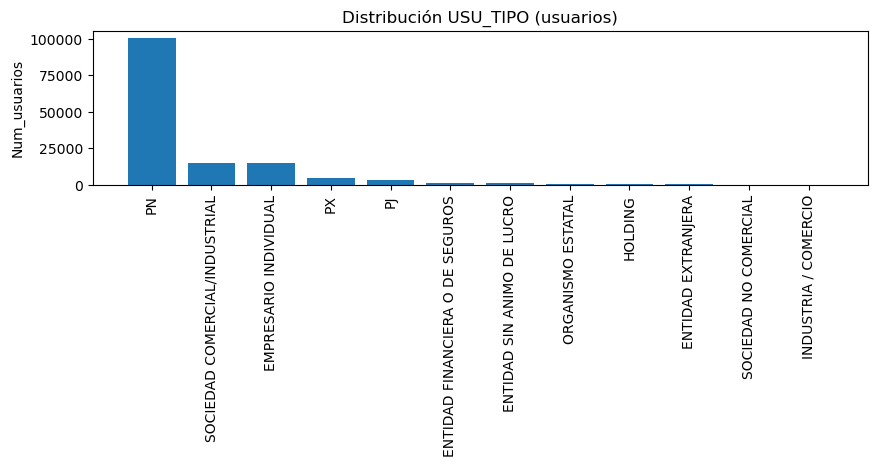

PN                                 1169
SOCIEDAD COMERCIAL/INDUSTRIAL       967
EMPRESARIO INDIVIDUAL               196
PX                                  137
PJ                                   46
ENTIDAD FINANCIERA O DE SEGUROS      44
ENTIDAD SIN ANIMO DE LUCRO           28
ENTIDAD EXTRANJERA                   15
HOLDING                              12
ORGANISMO ESTATAL                     1
Name: USU_TIPO, dtype: int64


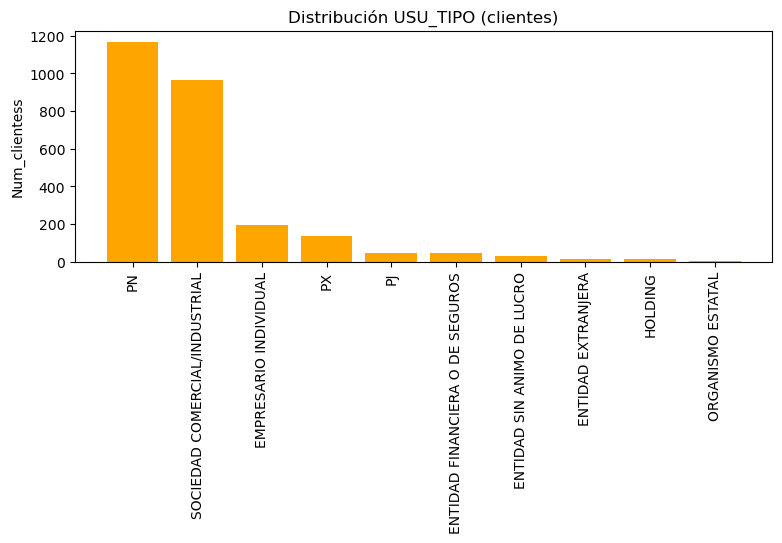

MC    22527
PQ     4078
SD     3456
GR     2385
MD     2375
Name: USU_TAMANIO, dtype: int64


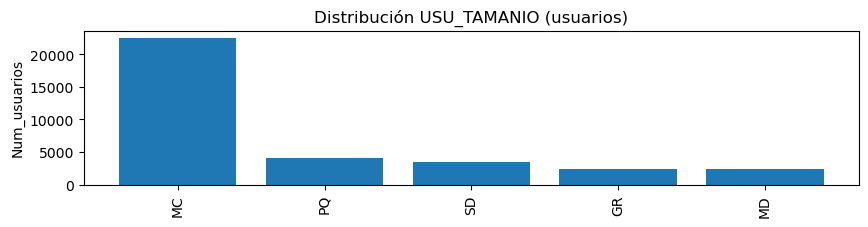

MC    569
PQ    309
MD    237
GR    139
SD     55
Name: USU_TAMANIO, dtype: int64


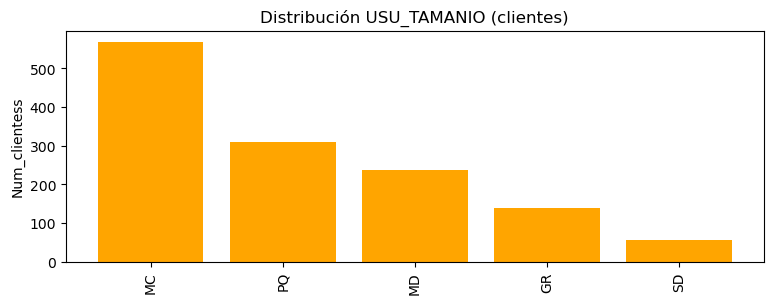

OTROS          20135
DESCONOCIDO     2775
G4711            916
M7110            765
M7020            721
I5611            695
N8299            672
G4771            589
G4773            562
F4290            551
I5630            549
S9499            544
G4752            489
G4719            469
H4923            446
C1410            435
L6810            430
S9602            426
M7310            416
K6621            407
G4530            382
G4659            382
F4111            359
M6910            355
G4663            351
Name: USU_CIIU, dtype: int64


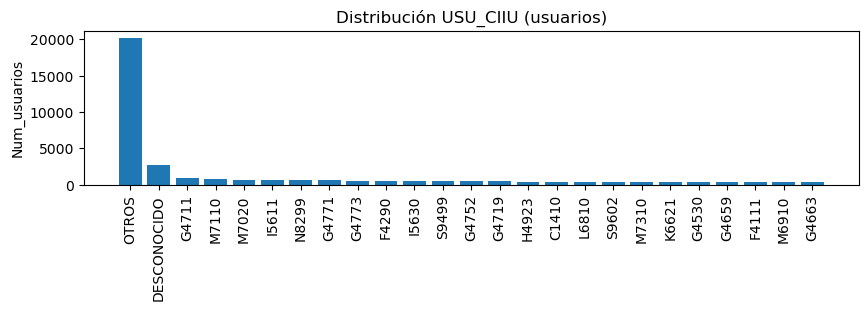

OTROS          828
M7020           68
DESCONOCIDO     46
M7110           43
G4659           41
L6810           28
M7310           27
F4290           27
M6910           22
G4663           21
H4923           20
N8299           13
K6621           12
G4530           12
G4752           12
C1410           12
I5611           11
G4711           11
F4111           11
S9499           11
G4719           10
G4773            7
I5630            7
G4771            6
S9602            3
Name: USU_CIIU, dtype: int64


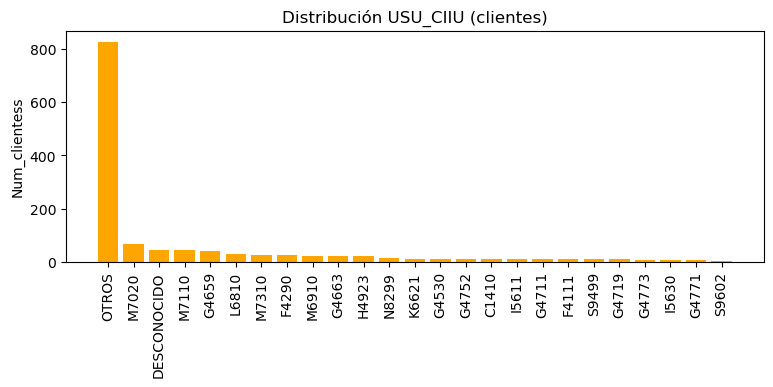

ACTIVA         25576
CANCELACIÓN     5034
DESCONOCIDO     2775
LIQUIDACION      981
OTROS            455
Name: USU_ESTADO, dtype: int64


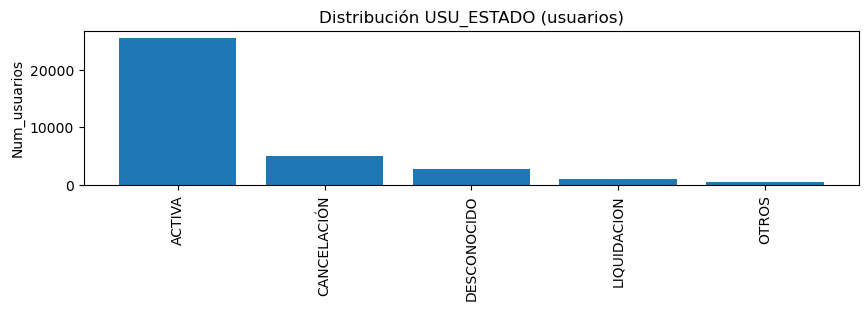

ACTIVA         1150
CANCELACIÓN      75
DESCONOCIDO      46
LIQUIDACION      23
OTROS            15
Name: USU_ESTADO, dtype: int64


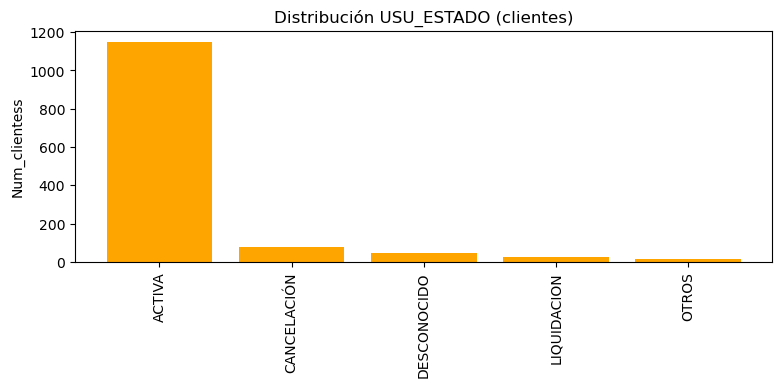

BOGOTA             13487
ANTIOQUIA           4149
VALLE               2806
OTROS               2082
CUNDINAMARCA        1874
ATLANTICO           1611
SANTANDER           1453
RISARALDA            857
BOLIVAR              814
BOYACA               796
NORTE SANTANDER      730
META                 673
HUILA                656
TOLIMA               590
NARINO               517
CALDAS               505
CAUCA                412
CESAR                410
MAGDALENA            399
Name: USU_DEPARTAMENTO, dtype: int64


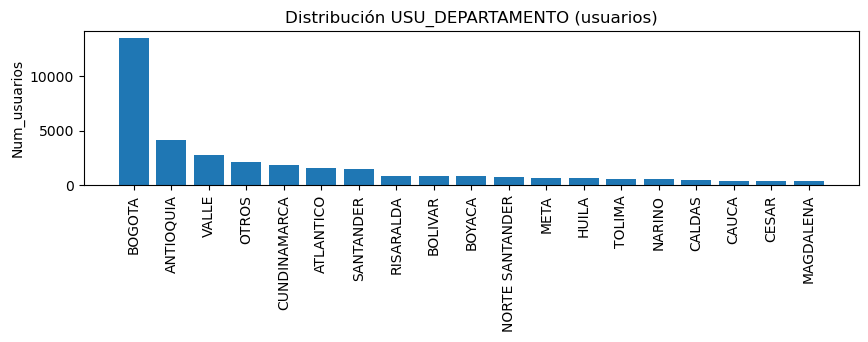

BOGOTA             681
ANTIOQUIA          217
VALLE               92
CUNDINAMARCA        67
ATLANTICO           54
SANTANDER           33
BOLIVAR             22
OTROS               21
RISARALDA           19
CALDAS              18
META                14
BOYACA              14
NARINO              12
TOLIMA              11
NORTE SANTANDER     11
MAGDALENA            6
HUILA                6
CESAR                6
CAUCA                5
Name: USU_DEPARTAMENTO, dtype: int64


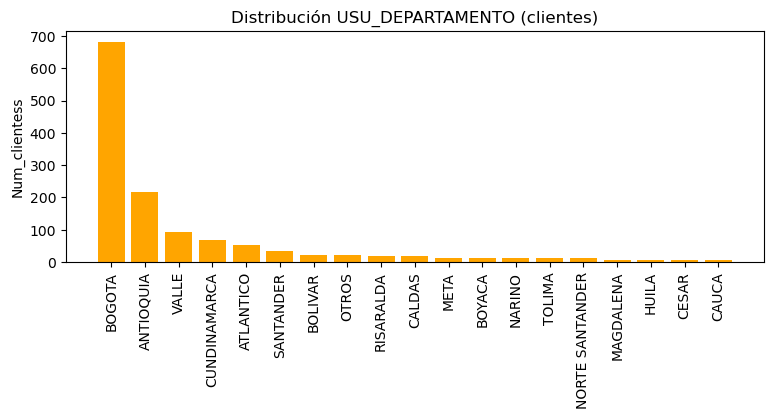

In [9]:
#Comparamos la distribución de las variables de los usuarios vs. clientes.
df_clientes = df_usuarios[df_usuarios['IND_CLIENTE'] == 1]
df_users = df_usuarios[df_usuarios['IND_CLIENTE'] == 0]

for variable in df_usuarios_cat:
    if variable != 'IND_CLIENTE':
        freq_user = df_users[variable].value_counts()
        print(freq_user)
        plt.bar(freq_user.index.values, freq_user)
        plt.xticks(rotation=90)
        plt.ylabel('Num_usuarios')
        plt.title('Distribución '+variable+' (usuarios)');
        plt.rcParams['figure.figsize']=(9,3)
        plt.show()
    
        freq_cli = df_clientes[variable].value_counts()
        print(freq_cli)
        plt.bar(freq_cli.index.values, freq_cli, color='orange')
        plt.xticks(rotation=90)
        plt.ylabel('Num_clientess')
        plt.title('Distribución '+variable+' (clientes)');
        plt.rcParams['figure.figsize']=(10,2)
        plt.show()

- En general, la distribución de las variables es prácticamente la misma entre usuarios y clientes. No obstante, podemos observar que hay mayor número de PJ entre los clientes.
- El perfil de cliente PJ que tenemos son medianas empresas, activas con sede en Bogotá, que se han registrado a través de directorios populares.

### 2.2. Datos sesiones

In [10]:
df_sesiones.head()

,IDUSUARIO,FECHA_SESION,SESIONES
0,"6868841,00",1/1/2018 0:00:00,12
1,"6868844,00",1/1/2018 0:00:00,4
2,"6868850,00",1/1/2018 0:00:00,4
3,"6868859,00",1/1/2018 0:00:00,3
4,"6868859,00",9/7/2018 0:00:00,1


In [11]:
#Tipo valores variables
df_sesiones['IDUSUARIO'] = df_sesiones['IDUSUARIO'].replace(',00','', regex=True).astype(int)
#Convertimos la variable FECHA_SESION en tipo datetime
df_sesiones["FECHA_SESION"] = df_sesiones["FECHA_SESION"].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y %H:%M:%S"))
print(df_sesiones.dtypes)

IDUSUARIO                int64
FECHA_SESION    datetime64[ns]
SESIONES                 int64
dtype: object


In [12]:
#Comprobación valores nulos
df_sesiones.isnull().sum()

IDUSUARIO       0
FECHA_SESION    0
SESIONES        0
dtype: int64

### 2.3. Datos consumos

In [13]:
df_consumos.head()

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST
0,"40057779,00","6868841,00","144920,00",Perfil Promocional,1/1/2018 0:00:00,2971771,P8544,BOGOTA,ACTIVA
1,"40057785,00","6868841,00","144917,00",Ficha Básica,1/1/2018 0:00:00,1520173,K6412,BOGOTA,CANCELACION
2,"40057775,00","6868841,00","144917,00",Ficha Básica,1/1/2018 0:00:00,2971771,P8544,BOGOTA,ACTIVA
3,"40057773,00","6868841,00","144917,00",Ficha Básica,1/1/2018 0:00:00,670007,7499,SANTANDER,ACTIVA
4,"40057767,00","6868841,00","144917,00",Ficha Básica,1/1/2018 0:00:00,2971771,P8544,BOGOTA,ACTIVA


In [14]:
#Tipo valores variables
df_consumos['IDCONSUMO'] = df_consumos['IDCONSUMO'].replace(',00','', regex=True).astype(int)
df_consumos['IDUSUARIO'] = df_consumos['IDUSUARIO'].replace(',00','', regex=True).astype(int)
df_consumos['IDPRODUCTO'] = df_consumos['IDPRODUCTO'].replace(',00','', regex=True)
#Convertimos la variable FECHA_CONSUMOS en tipo datetime
df_consumos["FECHACONSUMO"] = df_consumos["FECHACONSUMO"].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y %H:%M:%S"))
print(df_consumos.dtypes)

IDCONSUMO                  int64
IDUSUARIO                  int64
IDPRODUCTO                object
DESCPRODUCTO              object
FECHACONSUMO      datetime64[ns]
EMPCONSUL_ID               int64
EMPCONSUL_CIIU            object
EMPCONSUL_PROV            object
EMPCONSUL_EST             object
dtype: object


In [15]:
#Comprobación valores nulos
df_consumos.isnull().sum()

IDCONSUMO            0
IDUSUARIO            0
IDPRODUCTO           0
DESCPRODUCTO         0
FECHACONSUMO         0
EMPCONSUL_ID         0
EMPCONSUL_CIIU    9717
EMPCONSUL_PROV    9717
EMPCONSUL_EST     9717
dtype: int64

Ficha Básica          1328336
Perfil Promocional     271148
Name: DESCPRODUCTO, dtype: int64


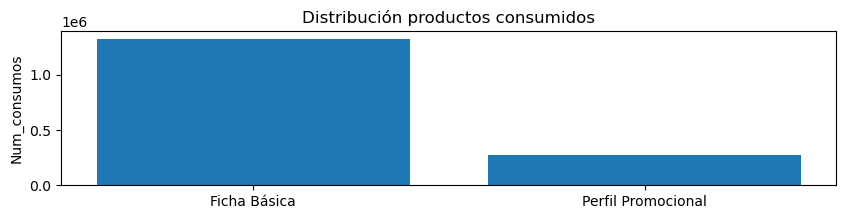

In [16]:
#Distribución de los productos consumidos
freq_consumprod = df_consumos['DESCPRODUCTO'].value_counts()
print(freq_consumprod)
plt.bar(freq_consumprod.index.values, freq_consumprod)
plt.ylabel('Num_consumos')
plt.title("Distribución productos consumidos");
plt.rcParams['figure.figsize']=(6,6)
plt.show()

- Como se puede apreciar, la mayoría de usuarios consumen fichas de empresa.

### 2.4. Datos ventas

In [17]:
df_ventas.head()

,IDVENTA,ID_USUARIO,FECHAVENTA,TIPOVENTA,IMPORTE,NUMVENTAS,IMPORTES,VP Informe,BONO,SUSCRIPCION,VP Listado
0,"40069190,00","6869761,00",2/1/2018 0:00:00,VP Informe,35000,1,"35000,00",1.0,NaN,NaN,NaN
1,"40071981,00","6869989,00",2/1/2018 0:00:00,VP Informe,15000,1,"15000,00",1.0,NaN,NaN,NaN
2,"40078934,00","6869802,00",3/1/2018 0:00:00,VP Listado,1070503,1,"1070503,00",NaN,NaN,NaN,1.0
3,"40090106,00","6872111,00",4/1/2018 0:00:00,VP Informe,25000,1,"25000,00",1.0,NaN,NaN,NaN
4,"40111415,00","6873222,00",5/1/2018 0:00:00,VP Informe,15000,1,"15000,00",1.0,NaN,NaN,NaN


In [18]:
#Renombramos la variable ID_USUARIO
df_ventas.rename(columns = {'ID_USUARIO':'IDUSUARIO'}, inplace = True)

#Tipos de valores variables
df_ventas['IDVENTA'] = df_ventas['IDVENTA'].replace(',00','', regex=True).astype(int)
df_ventas['IDUSUARIO'] = df_ventas['IDUSUARIO'].replace(',00','', regex=True).astype(int)
#Convertimos la variable FECHA_VENTAS en tipo datetime
df_ventas["FECHAVENTA"] = df_ventas["FECHAVENTA"].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y %H:%M:%S"))
print(df_ventas.dtypes)

IDVENTA                 int64
IDUSUARIO               int64
FECHAVENTA     datetime64[ns]
TIPOVENTA              object
IMPORTE                 int64
NUMVENTAS               int64
IMPORTES               object
VP Informe            float64
BONO                  float64
SUSCRIPCION           float64
VP Listado            float64
dtype: object


In [19]:
#Comprobación valores nulos
df_ventas.isnull().sum()

IDVENTA           0
IDUSUARIO         0
FECHAVENTA        0
TIPOVENTA         0
IMPORTE           0
NUMVENTAS         0
IMPORTES          0
VP Informe      268
BONO           2456
SUSCRIPCION    2572
VP Listado     2567
dtype: int64

#### 2.4.1 Tratamiento valores nulos ventas

In [20]:
df_ventas['VP Informe'].fillna(0,inplace=True)
df_ventas['BONO'].fillna(0,inplace=True)
df_ventas['SUSCRIPCION'].fillna(0,inplace=True)
df_ventas['VP Listado'].fillna(0,inplace=True)
#Comprobación valores nulos
df_ventas.isnull().sum()

IDVENTA        0
IDUSUARIO      0
FECHAVENTA     0
TIPOVENTA      0
IMPORTE        0
NUMVENTAS      0
IMPORTES       0
VP Informe     0
BONO           0
SUSCRIPCION    0
VP Listado     0
dtype: int64

VP Informe     2350
Bono            140
VP Listado       93
Suscripción      86
Name: TIPOVENTA, dtype: int64


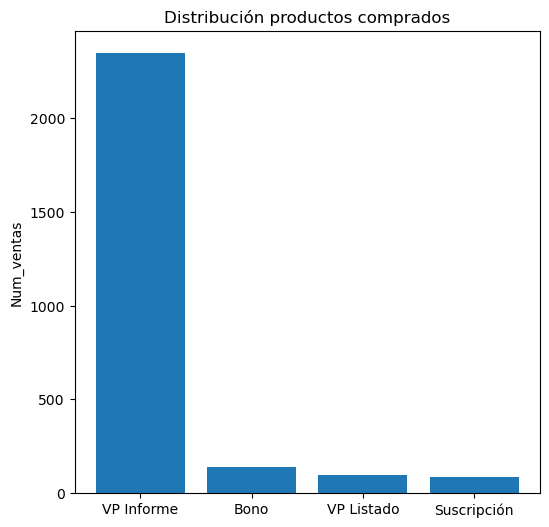

In [21]:
#Distribución de las ventas por tipo de producto
freq_prod = df_ventas['TIPOVENTA'].value_counts()
print(freq_prod)
plt.bar(freq_prod.index.values, freq_prod)
plt.rcParams['figure.figsize']=(6,6)
plt.ylabel('Num_ventas')
plt.title("Distribución productos comprados");

- La mayoría de compras que han hecho los clientes son ventas puntuales de informes.

## 3. Transformación de datos

Primero de todo, cuadramos la base de datos de usuarios y de ventas para tener el número real de clientes. Podemos ver que hay mayor número de clientes una vez hecho él cuadre.

Después creamos una nueva variable VFC (Valor Futuro Cliente), esta variable nos servirá para clasificar el tipo de cliente que es en función de su compra y obtener aquellos clientes que más rentables para la empresa. Clasificamos como 0 aquel cliente que compra de manera puntual, el 1 el cliente que compra bonos y el 2 el cliente que se suscribe.

In [22]:
#Cuadramos los datos de las ventas con los datos de clientes
df_usuarios1 = pd.merge(df_usuarios, df_ventas[['IDUSUARIO','NUMVENTAS','FECHAVENTA','VP Informe','BONO','SUSCRIPCION', 'VP Listado']], on=['IDUSUARIO'], how='left')

df_usuarios1.loc[df_usuarios1['FEC_CLIENTE'].isna(),'IND_CLIENTE']=0
df_usuarios1.loc[df_usuarios1['NUMVENTAS']>0,'IND_CLIENTE']=1
df_usuarios1.loc[df_usuarios1['NUMVENTAS']<1,'IND_CLIENTE']=0
df_usuarios1.loc[(df_usuarios1['IND_CLIENTE']==1),'FEC_CLIENTE']=df_usuarios1['FECHAVENTA']

#Comprobamos que coincida el numero de clientes con la base de ventas
print(len(df_ventas))
print(len(df_usuarios1.loc[df_usuarios1['IND_CLIENTE']==1]))

2669
2669


0.0    2375
1.0     197
2.0      97
Name: VFC, dtype: int64


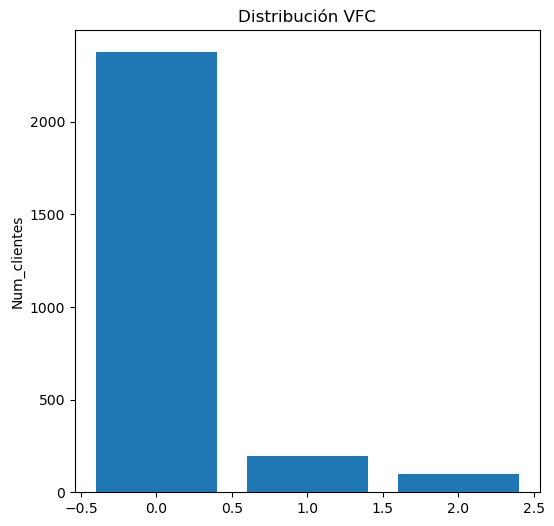

In [23]:
#Creamos una variable 'VFC' (Valor Futuro Cliente) clasificando por el tipo de compra
df_usuarios1.loc[(df_usuarios1['VP Informe']==1) | (df_usuarios1['VP Listado']==1),'VFC']=0
df_usuarios1.loc[(df_usuarios1['BONO']==1) | (df_usuarios1['SUSCRIPCION']==1),'VFC']=1
df_usuarios1.loc[df_usuarios1['SUSCRIPCION']==1,'VFC']=2

#Distribución cliente por VFC
freq_vfc = df_usuarios1['VFC'].value_counts()
print(freq_vfc)
plt.bar(freq_vfc.index.values, freq_vfc)
plt.ylabel('Num_clientes')
plt.title("Distribución VFC");

In [24]:
#Descartamos aquellas variables que no nos interesan
df_usuarios1 = df_usuarios1.drop(columns=['FECHAVENTA','NUMVENTAS','VP Informe','BONO','SUSCRIPCION',\
                                          'VP Listado'], axis=1)

Creamos una variable 'SESIONES_PRE' con el número de sesiones realizadas el mismo día de la compra, para ver así si existe alguna relación entre el número de sesiones y la compra.

In [25]:
#Contamos el numero de sesiones realizadas el mismo dia de la fecha de la compra
df_sesiones2 = pd.merge(df_sesiones, df_usuarios1, on=['IDUSUARIO'], how='outer')

df_sesiones_sum = df_sesiones2.groupby(["IDUSUARIO"])["SESIONES"].sum().to_frame().reset_index()
df_sesiones_sum.columns = ['IDUSUARIO','TOTAL_SESIONES']

df_sesiones3=df_sesiones2.loc[df_sesiones2['FEC_CLIENTE'].notna()]

dict_sesiones = {}

for index, row in df_sesiones3.iterrows():
    id_usuario = row['IDUSUARIO']
    sesiones = row['SESIONES']
    fecha_sesion = row['FECHA_SESION']
    fecha_cliente = row['FEC_CLIENTE']

    if fecha_sesion == fecha_cliente:
        if id_usuario not in dict_sesiones:
            dict_sesiones[id_usuario]=sesiones
        else:
            total_sesiones = dict_sesiones[id_usuario] + sesiones
            dict_sesiones[id_usuario]=total_sesiones

df_sesiones_pre = pd.DataFrame(dict_sesiones.items(), columns=['IDUSUARIO', 'SESIONES_PRE'])

Realizamos un resumen estadístico de la variable nueva para ver como se distribuye.

In [26]:
#Datos estadísticos variable 'SESIONES_PRE'
df_sesiones_pre['SESIONES_PRE'].describe()

count    2618.000000
mean       13.186402
std        15.662409
min         1.000000
25%         6.000000
50%         9.000000
75%        15.000000
max       310.000000
Name: SESIONES_PRE, dtype: float64

Y después realizamos una normalización, para evitar datos atípicos que puedan influir en nuestro modelo.

In [27]:
df_sesiones_pre['SESIONES_PRE'] = preprocessing.scale(df_sesiones_pre['SESIONES_PRE'])

Ahora, creamos dos nuevas variables 'PRODUCTO_144917_PRE' y 'PRODUCTO_144920_PRE' con el número de consumos por producto realizados el mismo día de la compra, para ver así si existe alguna relación entre el producto consumido y la compra.

In [28]:
#Contamos el numero de productos consumidos el mismo dia de la fecha de la compra
df_consumos2 = pd.merge(df_consumos, df_usuarios1, on=['IDUSUARIO'], how='outer')
df_consumos3 = df_consumos2.loc[df_consumos2['FEC_CLIENTE'].notna()]
list_id = []
list_ficha = []
list_perfil = []

for index, row in df_consumos3.iterrows():
    id_usuario = row['IDUSUARIO']
    id_producto = row['IDPRODUCTO']
    fecha_sesion = row['FECHACONSUMO']
    fecha_cliente = row['FEC_CLIENTE']
    
    if fecha_sesion == fecha_cliente:
        if id_producto == "144920":
            list_perfil.append(1)
            list_ficha.append(0)
        else:
            list_perfil.append(0)
            list_ficha.append(1)
        
        list_id.append(id_usuario)
    
list_consumos = [list_id, list_ficha, list_perfil]
df_consum = pd.DataFrame (list_consumos).transpose()
df_consum.columns = ['IDUSUARIO', 'PRODUCTO_144917_PRE','PRODUCTO_144920_PRE']

df_consum1 = df_consum.groupby('IDUSUARIO')['PRODUCTO_144917_PRE'].sum()
df_consum1.columns = ['IDUSUARIO','PRODUCTO_144917_PRE']

df_consum2 = df_consum.groupby('IDUSUARIO')['PRODUCTO_144920_PRE'].sum()
df_consum2.columns = ['IDUSUARIO','PRODUCTO_144920_PRE']

df_consum_pre = pd.merge(df_consum1, df_consum2, on=['IDUSUARIO'], how='outer')
df_consum_pre.columns = ['PRODUCTO_144917_PRE', 'PRODUCTO_144920_PRE']
df_consum_pre = df_consum_pre.reset_index()

Realizamos un resumen estadístico de la variable nueva para ver como se distribuye.

In [29]:
#Datos estadísticos variable 'PRODUCTO_144917_PRE'
df_consum_pre['PRODUCTO_144917_PRE'].describe()

count    2216.000000
mean        5.679603
std        14.188580
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       315.000000
Name: PRODUCTO_144917_PRE, dtype: float64

Y después realizamos una normalización, para evitar datos atípicos que puedan influir en nuestro modelo.

In [30]:
df_consum_pre['PRODUCTO_144917_PRE'] = preprocessing.scale(df_consum_pre['PRODUCTO_144917_PRE'])

Repetimos el mismo proceso para la variable 'PRODUCTO_144920_PRE'.

In [31]:
#Datos estadísticos variable 'PRODUCTO_144920_PRE'
df_consum_pre['PRODUCTO_144920_PRE'].describe()

count    2216.000000
mean        0.734657
std         1.062808
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: PRODUCTO_144920_PRE, dtype: float64

In [32]:
df_consum_pre['PRODUCTO_144920_PRE'] = preprocessing.scale(df_consum_pre['PRODUCTO_144920_PRE'])

Añadimos las nuevas variables al Dataset con los usuarios y las ventas que hemos creado anteriormente.

In [33]:
#Unimos las sesiones y los productos consumidos a la base de usuarios
df_usuarios2 = pd.merge(df_usuarios1, df_sesiones_pre, on=['IDUSUARIO'], how='left')
df_usuarios3 = pd.merge(df_usuarios2, df_consum_pre, on=['IDUSUARIO'], how='left')
df_usuarios3.head()

,IDUSUARIO,TIPOUSUARIO,FEC_REGISTRO,CANAL_REGISTRO,IND_CLIENTE,TIPOEMAIL,BONDAD_EMAIL,USU_TIPO,USU_TAMANIO,USU_CIIU,USU_ESTADO,USU_DEPARTAMENTO,FEC_CLIENTE,VFC,SESIONES_PRE,PRODUCTO_144917_PRE,PRODUCTO_144920_PRE
0,7668403,PF,14/3/2019 0:00:00,Directorios populares,0,gmail.com,20,PN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7667922,PF,14/3/2019 0:00:00,Directorios populares,0,hotmail.com,20,PN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7721206,PJ,10/4/2019 0:00:00,SEO,0,ilc.com.co,20,PJ,SD,DESCONOCIDO,DESCONOCIDO,CALDAS,NaN,NaN,NaN,NaN,NaN
3,7667953,PJ,14/3/2019 0:00:00,Directorios populares,0,gmail.com,20,EMPRESARIO INDIVIDUAL,MC,M7110,ACTIVA,BOGOTA,NaN,NaN,NaN,NaN,NaN
4,7667971,PJ,14/3/2019 0:00:00,Directorios populares,0,acadia.com.co,20,SOCIEDAD COMERCIAL/INDUSTRIAL,PQ,L6810,ACTIVA,BOGOTA,NaN,NaN,NaN,NaN,NaN


In [34]:
#Comprobamos que coincida el numero de clientes con la base de ventas
print(len(df_ventas))
print(len(df_usuarios3.loc[df_usuarios3['IND_CLIENTE']==1]))

2669
2669


In [35]:
#Descartamos aquellas variables que no se van a incluir en el modelo
df_usuarios4 = df_usuarios3.drop(columns=['IDUSUARIO','FEC_REGISTRO','TIPOEMAIL','FEC_CLIENTE'])

In [36]:
#Comprobamos los valores nulos de la base resultante
df_usuarios4.isnull().sum()

TIPOUSUARIO                 0
CANAL_REGISTRO              0
IND_CLIENTE                 0
BONDAD_EMAIL                0
USU_TIPO                    0
USU_TAMANIO            106606
USU_CIIU               106606
USU_ESTADO             106606
USU_DEPARTAMENTO       106606
VFC                    140067
SESIONES_PRE           140118
PRODUCTO_144917_PRE    140520
PRODUCTO_144920_PRE    140520
dtype: int64

In [37]:
#Tratamiento de valores nulos para las variables SESIONES_PRE, PRODUCTO_144917_PRE, PRODUCTO_144920_PRE
df_usuarios4['SESIONES_PRE'].fillna(0,inplace=True)
df_usuarios4['PRODUCTO_144917_PRE'].fillna(0,inplace=True)
df_usuarios4['PRODUCTO_144920_PRE'].fillna(0,inplace=True)

## 4. Correlaciones

Realizamos una matriz de correlaciones para las variables numéricas, para detectar así si hay posible correlación entre algunas variables y evitar así un posible sobreentrenamiento en el modelo.

<AxesSubplot:title={'center':'Matriz de correlaciones'}>

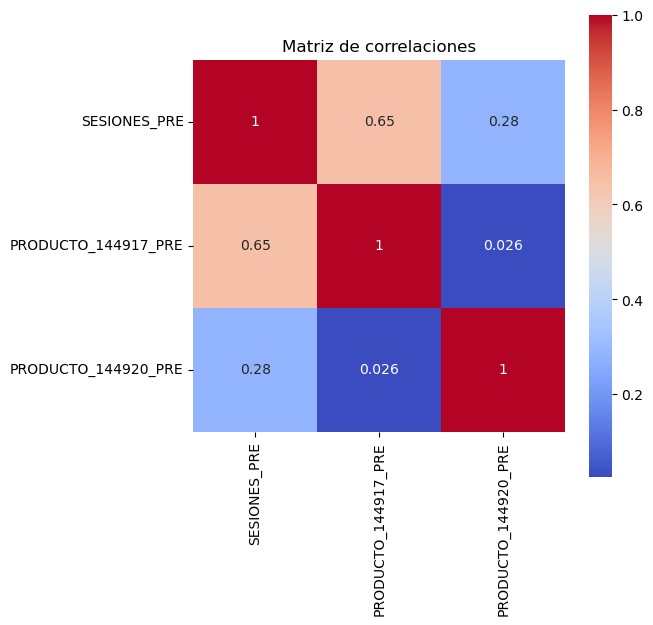

In [38]:
#Comprobamos si hay correlación entre las variables numericas
variables_num = ['SESIONES_PRE','PRODUCTO_144917_PRE','PRODUCTO_144920_PRE']
plt.figure(figsize=(6,6))
plt.title('Matriz de correlaciones')
sns.heatmap(df_usuarios4[variables_num].astype(float).corr(), 
            square=True, cmap='coolwarm', annot=True)

Podemos observar que existe correlación entre los productos consumidos y el número de sesiones, tiene lógica teniendo en cuenta que es necesario iniciar sesión para consumir un producto. Para ello, descartamos la variable 'SESIONES_PRE'.

In [39]:
#Descartamos la variable 'SESIONES_PRE' para el modelo
df_usuarios4 = df_usuarios4.drop(columns=['SESIONES_PRE', 'BONDAD_EMAIL'], axis=1)

In [40]:
#Realizamos una transformación One Hot Encoder
df_trans = pd.get_dummies(df_usuarios4, columns=['TIPOUSUARIO','CANAL_REGISTRO',\
                                                     'USU_TIPO','USU_TAMANIO','USU_CIIU','USU_ESTADO',\
                                                      'USU_DEPARTAMENTO']
                            , dummy_na=True)

Una vez realizada la transformación One Hot Encoder, volvemos a realizar una matriz de correlación, para observar si hay alguna correlación entre las variables que vamos a introducir en el modelo y la variable respuesta.

In [41]:
#Observamos la matriz de correlaciones con las variables que se usarán en el modelo
corr = df_trans.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

En este caso, no vemos ninguna correlación entre las variables independientes y respuesta IND_CLIENTE.
Por otro lado, parece ser que hay una muy leve correlación entre la variable respuesta VFC y los usuarios de tipo PJ, aunque nada significativo, ya que es <0.5.

## 5. Tratamiento desbalanceo

En este paso, procedemos a utilizar diferentes técnicas de balanceo de datos como son: undersampleng, oversampling y SMOTE. Luego entrenamos un Random Forest para poder comparar los diferentes resultados entre las técnicas y escogemos la técnica que nos dé mejor resultados.

In [42]:
#Seleccionamos las variables explicativas y la variable target
X = np.array(df_trans.drop(columns=['IND_CLIENTE','VFC']))
y = np.array(df_trans['IND_CLIENTE'])

#Seleccionamos el conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
tec_resample = []
accuracy_res = []
precision_res = []
recall_res = []
f1score_res = []

#Función que devuelve resultados de las metricas
def mostrar_metricas(y_test, y_pred):
    print (classification_report(y_test, y_pred))

#Creamos un RandomForest para probar las diferentes tecnicas de balanceo de datos
def resampling(X_train, y_train):
    random_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
    random_clf.fit(X_train, y_train)
    y_pred = random_clf.predict(X_test)
    y_proba = random_clf.predict_proba(X_test)
    
    if len(tec_resample) > 0:
        accuracy_res.append(accuracy_score(y_test, y_pred))
        precision_res.append(precision_score(y_test, y_pred))
        recall_res.append(recall_score(y_test, y_pred))
        f1score_res.append(f1_score(y_test, y_pred))
    
    
    mostrar_metricas(y_test, y_pred)

In [44]:
resampling(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28021
           1       1.00      0.84      0.91       527

    accuracy                           1.00     28548
   macro avg       1.00      0.92      0.96     28548
weighted avg       1.00      1.00      1.00     28548



### Undersampling

In [45]:
#Relaizamos un• reemuestreo con la tecnica Undersampling
undersampling = NearMiss()
X_train_resample, y_train_resample = undersampling.fit_sample(X_train, y_train)
tec_resample.append('Undersampling')

resampling(X_train_resample, y_train_resample)

              precision    recall  f1-score   support

           0       1.00      0.72      0.83     28021
           1       0.06      0.94      0.11       527

    accuracy                           0.72     28548
   macro avg       0.53      0.83      0.47     28548
weighted avg       0.98      0.72      0.82     28548



### Oversampling

In [46]:
#Relaizamos un reemuestreo con la tecnica Oversampling
oversampling = RandomOverSampler(random_state=42)
X_train_resample, y_train_resample = oversampling.fit_resample(X_train, y_train)
tec_resample.append('Oversampling')

resampling(X_train_resample, y_train_resample)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     28021
           1       0.38      0.87      0.53       527

    accuracy                           0.97     28548
   macro avg       0.69      0.92      0.76     28548
weighted avg       0.99      0.97      0.98     28548



### SMOTE

In [47]:
#Relaizamos un reemuestreo con la tecnica SMOTE
smote = SMOTE(random_state=42, sampling_strategy=1)
X_train_resample, y_train_resample = smote.fit_sample(X_train, y_train)

tec_resample.append('SMOTE')

resampling(X_train_resample, y_train_resample)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28021
           1       0.68      0.85      0.76       527

    accuracy                           0.99     28548
   macro avg       0.84      0.92      0.88     28548
weighted avg       0.99      0.99      0.99     28548



In [48]:
#Comparamos los resultados de las metricas de las tecnicas utilizadas
lista_metricas = [tec_resample, accuracy_res, precision_res, recall_res, f1score_res]

metricas_results = df = pd.DataFrame (lista_metricas).transpose()
df.columns = ['Tecnica', 'Accuracy', 'Precision','Recall','F1-Score']

metricas_results

,Tecnica,Accuracy,Precision,Recall,F1-Score
0,Undersampling,0.721522,0.058628,0.935484,0.11034
1,Oversampling,0.971206,0.3782,0.86907,0.527043
2,SMOTE,0.989877,0.680303,0.851992,0.756529


Utilizamos la métrica F1-Score para comparar los resultados. Esta métrica nos indicará cuanto de preciso es el modelo y qué capacidad tiene para identificar las clases correctamente.

La creación de muestras sintéticas de la clase minoritaria (SMOTE) es la que consigue obtener mejores resultados, como podemos observar en F1-score.

## 6. Modelos

In [49]:
#Aplicamos la tecnica SMOTE al conjunto de entrenamiento que utilizaremos para el modelo.
smote = SMOTE(random_state=42, sampling_strategy=1)
X_train, y_train = smote.fit_sample(X_train, y_train)

### 6.1. Modelos de classificación (predicción clientes)

En este primer modelo se van a probar diferentes modelos de clasificación para predecir los potenciales clientes, se compararán entre ellos y se escogerá aquel que mejores resultados obtenga.

In [50]:
tec_resample = []
accuracy_res = []
precision_res = []
recall_res = []
f1score_res = []
auc_res = []
features = df_trans.drop(columns=['IND_CLIENTE','VFC']).columns

def mostrar_atributos_relevantes(importance):
    atributos_relevantes = []

    for i,v in enumerate(importance):
        if v > 0:
            atributos_relevantes.append((features[i], v))
        
    atributos_relevantes.sort(key = lambda x: x[1], reverse = False)

    pd.DataFrame(atributos_relevantes, columns=['feature','value']).set_index('feature').plot(kind='barh', figsize=(6, 10));

def dibujar_curva_roc(y_test, y_proba):
    y_proba = y_proba[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
 
    plt.figure(figsize = (6,6))
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('1-Especificidad')
    plt.ylabel('Sensibilidad')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

def mostrar_resultados(y_test, y_pred, y_proba):
        conf_matrix = confusion_matrix(y_test, y_pred)
        print (classification_report(y_test, y_pred))
        plt.figure(figsize=(6, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d");
        plt.title("Matriz de confusión")
        plt.ylabel('Clase verdadera')
        plt.xlabel('Clase predicha')
        plt.show()
        dibujar_curva_roc(y_test, y_proba)

#Función que entrena un modelo, predice y calcula sus metricas
def modelling(modelo, X_train, y_train, X_test, y_test):
    
    modelo.fit(X_train, y_train)
    accuracy = modelo.score(X_test,y_test)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)
    
    accuracy_res.append(modelo.score(X_test,y_test))
    precision_res.append(precision_score(y_test, y_pred))
    recall_res.append(recall_score(y_test, y_pred))
    f1score_res.append(f1_score(y_test, y_pred))
    auc_res.append(roc_auc_score(y_test, y_pred))
    mostrar_resultados(y_test, y_pred, y_proba)

#### Regressión Logistica

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     28021
           1       0.05      0.51      0.09       527

    accuracy                           0.81     28548
   macro avg       0.52      0.67      0.49     28548
weighted avg       0.97      0.81      0.88     28548



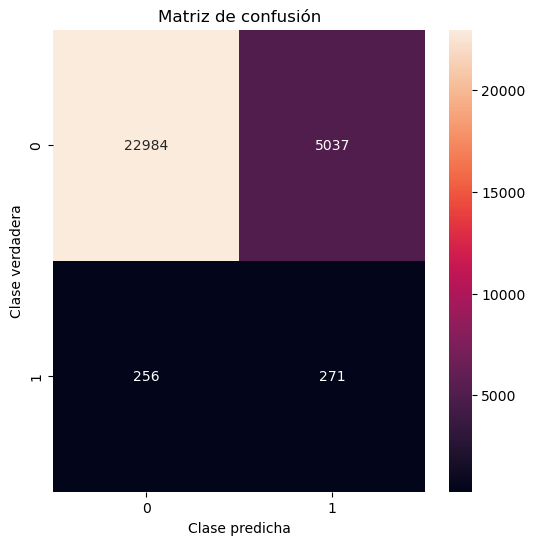

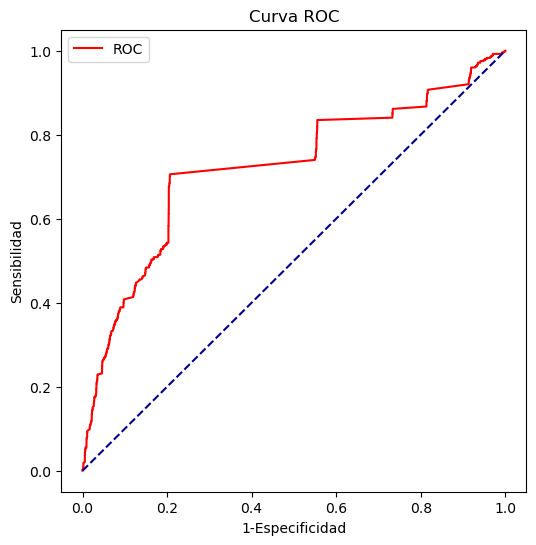

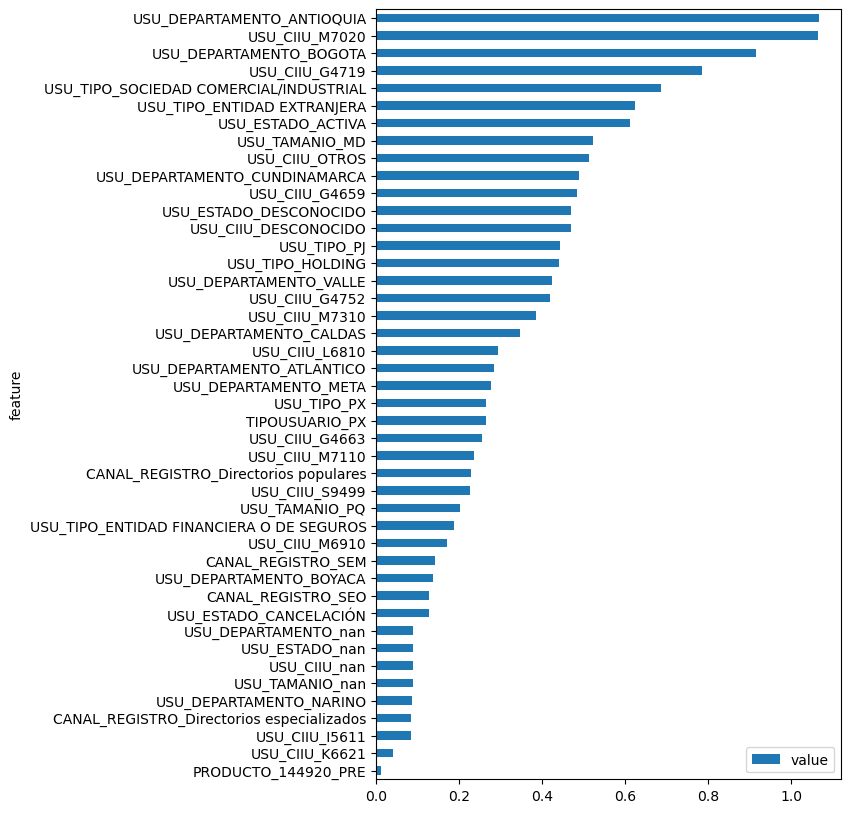

In [51]:
#Creamos un modelo de regresión logistica
modelo_RL = LogisticRegression(random_state=42)
tec_resample.append('Regressión Logistica')

modelling(modelo_RL, X_train, y_train, X_test, y_test)

importance = modelo_RL.coef_[0]

mostrar_atributos_relevantes(importance)

Podemos ver que el modelo es capaz de clasificar correctamente el 99% la clase 0 (usuarios), en cambio, solo es capaz de clasificar correctamente el 5% de la clase 1 (clientes) que es la que nos interesa.
De la misma manera, estos resultados se reflejan en la curva ROC. Como podemos ver, la curva no es muy pronunciada, por lo que el Área de debajo de la curva será cercana a 0.5, lo que nos indica que el modelo no es capaz de distinguir entre las dos clases.

#### Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28021
           1       0.73      0.85      0.78       527

    accuracy                           0.99     28548
   macro avg       0.86      0.92      0.89     28548
weighted avg       0.99      0.99      0.99     28548



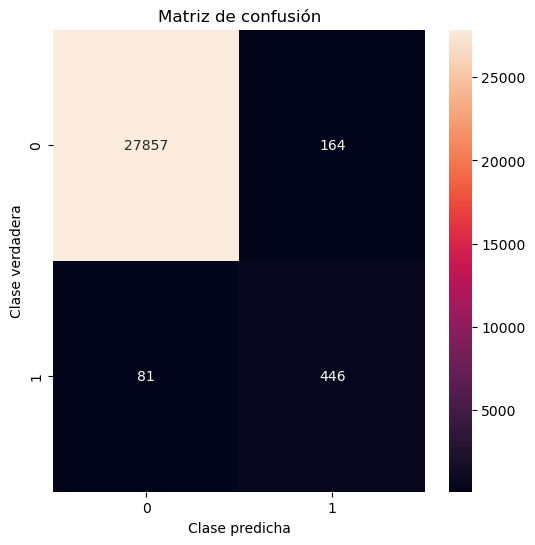

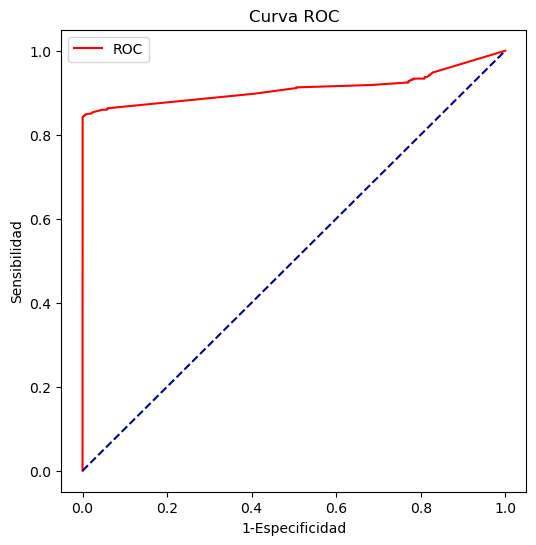

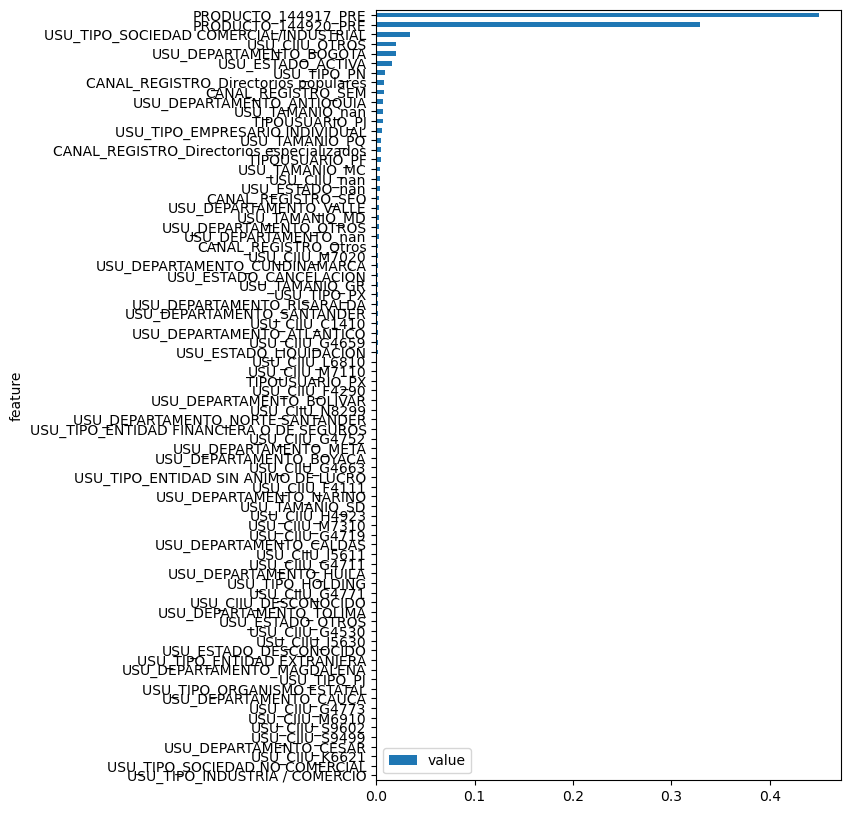

In [52]:
#Creamos un modelo Random Forest
modelo_RF = RandomForestClassifier(random_state=42)
tec_resample.append('Random Forest Classifier')

modelling(modelo_RF, X_train, y_train, X_test, y_test)

importance = modelo_RF.feature_importances_

mostrar_atributos_relevantes(importance)

Para el modelo de RandomForest obtenemos mejores resultados respecto la regresión logística.

#### Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28021
           1       0.76      0.85      0.80       527

    accuracy                           0.99     28548
   macro avg       0.88      0.92      0.90     28548
weighted avg       0.99      0.99      0.99     28548



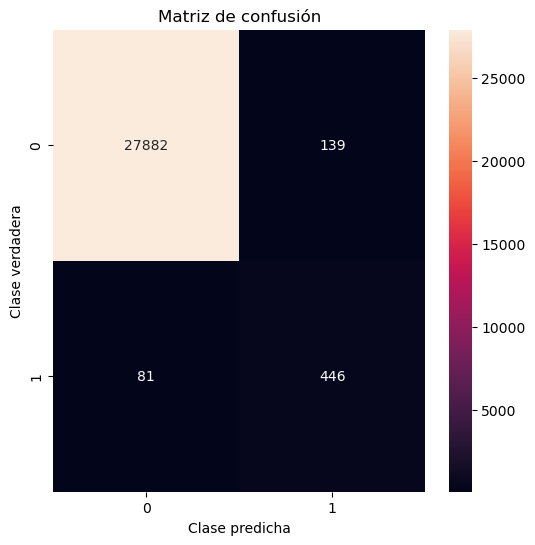

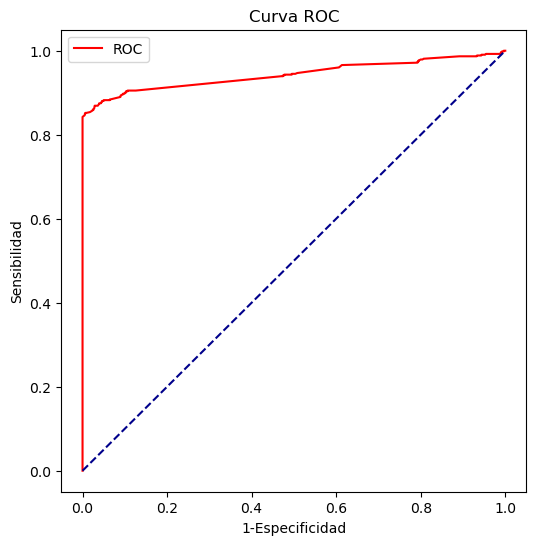

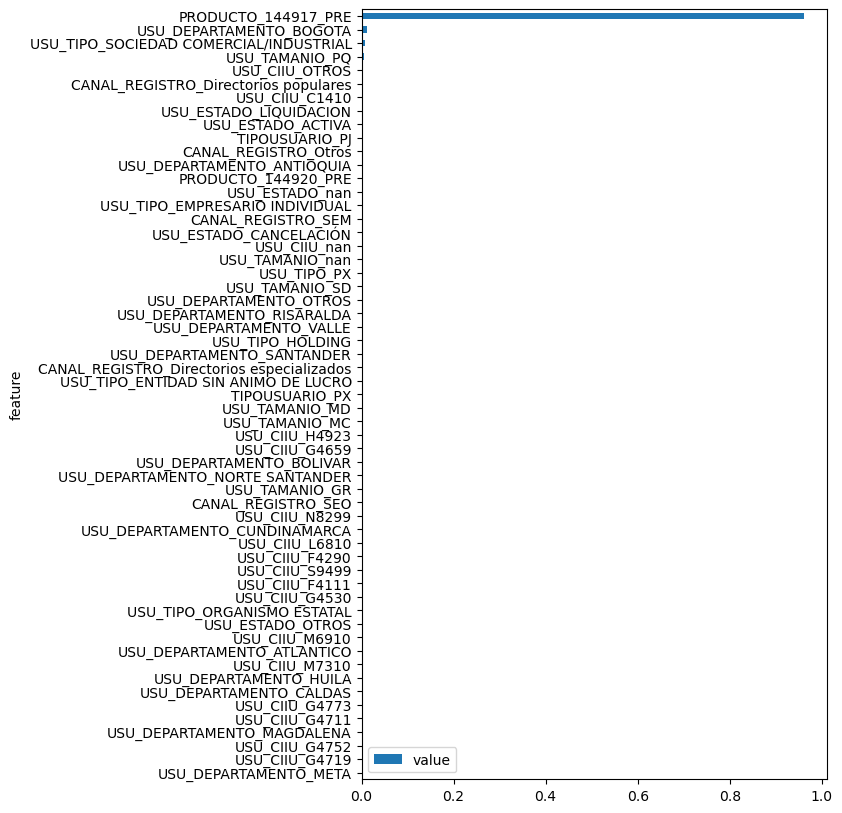

In [53]:
#Creamos un modelo Graddient Boosting Classifier
modelo_GBC = GradientBoostingClassifier(random_state=42)
tec_resample.append('Gradient Boosting Classifier')

modelling(modelo_GBC, X_train, y_train, X_test, y_test)

importance = modelo_GBC.feature_importances_

mostrar_atributos_relevantes(importance)

Podemos observar que el modelo Gradient Boosting mejora ligeramente a la hora de clasificar respecto a los árboles de decisión y Random Forest. Esto se debe a que el Gradient Boosting, entrena árboles individuales de manera secuencial, de tal forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores.

#### Support Vector Machine (SVM)

In [54]:
'''
#Creamos un modelo SVM
modelo_SVM = SVC(kernel = 'linear', probability=True, random_state=42)
tec_resample.append('SVM')

modelling(modelo_SVM, X_train, y_train, X_test, y_test)
'''

"\n#Creamos un modelo SVM\nmodelo_SVM = SVC(kernel = 'linear', probability=True, random_state=42)\ntec_resample.append('SVM')\n\nmodelling(modelo_SVM, X_train, y_train, X_test, y_test)\n"

No se ha entrenado este modelo debido al alto consumo de recursos necesarios para su ejecución.

#### Comparación modelos

In [55]:
#Comparamos los resultados de las metricas de los diferentos modelos
lista_metricas = [tec_resample, accuracy_res, precision_res, recall_res, f1score_res, auc_res]

metricas_results = pd.DataFrame (lista_metricas).transpose()
metricas_results.columns = ['Tecnica', 'Accuracy', 'Precision','Recall','F1-Score','AUC']

metricas_results

,Tecnica,Accuracy,Precision,Recall,F1-Score,AUC
0,Regressión Logistica,0.814593,0.051055,0.514231,0.092888,0.667237
1,Random Forest Classifier,0.991418,0.731148,0.8463,0.784521,0.920224
2,Gradient Boosting Classifier,0.992294,0.762393,0.8463,0.802158,0.92067


Teniendo en cuenta que es un modelo de clasificación, que tenemos clases desbalanceadas y que hemos aplicado una técnica de remuestreo SMOTE tendremos en cuenta el F1-Score y el área de debajo de la curva ROC (AUC).

Por un lado, F1-Score combina las medidas de precisión y recall, es decir, nos indicará cuanto de preciso es el modelo y qué capacidad tiene para identificar las clases correctamente.
Por otro lado, el área de debajo de la curva ROC (AUC) nos permite saber qué capacidad tiene el modelo para distinguir dos clases.

A la vista de los resultados, podemos observar que los modelos de árboles de decisión, Random Forest y GradientBoosting son los mejores modelos para la clasificación de los clientes. En este caso, entrenaremos un modelo GradientBoosting, ya que es el que mejor resultado nos ha dado.

#### Modelo final

Finalmente, escogemos el modelo de GradientBoosting, y aplicamos la validación cruzada.

In [56]:
modelo_final = GradientBoostingClassifier()

'''
parametros = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1]
    
}
grid_search = GridSearchCV(modelo_final, parametros, scoring = 'roc_auc', n_jobs=5, cv=5)
grid_search.fit(X_train,y_train)

print("Mejor combinación de hiperparametros: ",grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)
'''

score_val_res = cross_val_score(modelo_final, X_train, y_train, scoring="f1", cv = 5)
print(score_val_res)
print("Media: ", score_val_res.mean())
print("Desviación standard: ", score_val_res.std())

[0.93730245 0.93959163 0.94035154 0.93983617 0.94227197]
Media:  0.9398707506827793
Desviación standard:  0.0015919978351154906


Para este modelo no se han optimizado los hiperparámetros debido al alto consumo de recursos necesarios para su realización.

### 6.2. Modelo de classificación (predicción tipo de cliente)

En este segundo modelo se van a probar diferentes modelos de clasificación para predecir el tipo de cliente que será, se compararan los distintos modelos y se escogerá aquel que mejores resultados obtenga.

Hemos podido observar que hay un desbalanceo en cuanto al tipo de cliente VFC. En este caso, estamos delante de un caso de clasificación multiclase. Para este tipo de problemas existen diferentes técnicas para el desbalanceo de datos, como puede ser OneVsAll o OneVsOne.

No obstante, en nuestro caso sabemos que hay dos tipos de clientes que le interesa al e-commerce como son los clientes que compran bonos y suscripciones, por lo que agruparemos estos dos en una sola clase (1) y al resto que son de compra puntual los agruparemos en otra (0).

In [57]:
#Agrupamos los clientes con Bono y Suscripción
df_usuarios4.loc[(df_usuarios4['VFC']==1) | (df_usuarios4['VFC']==2),'VFC']=1

In [58]:
#Descartamos la variable IND_CLIENTE
df_usuarios5 = df_usuarios4.loc[(df_usuarios4['IND_CLIENTE']==1)]

df_usuarios5 = df_usuarios5.drop(columns=['IND_CLIENTE','USU_CIIU'])

#Realizamos una transformación One Hot Encoder
df_trans = pd.get_dummies(df_usuarios5, columns=['TIPOUSUARIO','CANAL_REGISTRO',\
                                                     'USU_TIPO','USU_TAMANIO','USU_ESTADO',\
                                                      'USU_DEPARTAMENTO']
                            , dummy_na=True)

In [59]:
tec_resample = []
accuracy_res = []
precision_res = []
recall_res = []
f1score_res = []
auc_res = [] 

#Seleccionamos las variables explicativas y la variable target
X = np.array(df_trans.drop(columns=['VFC']))
y = np.array(df_trans['VFC'])

#Seleccionamos el conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42, sampling_strategy=1)
X_train, y_train = smote.fit_sample(X_train, y_train)

#### Regresión Logística

              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86       473
         1.0       0.31      0.82      0.45        61

    accuracy                           0.77       534
   macro avg       0.64      0.79      0.65       534
weighted avg       0.90      0.77      0.81       534



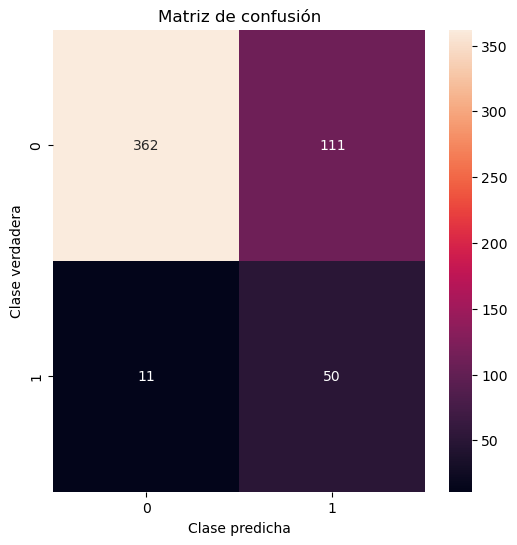

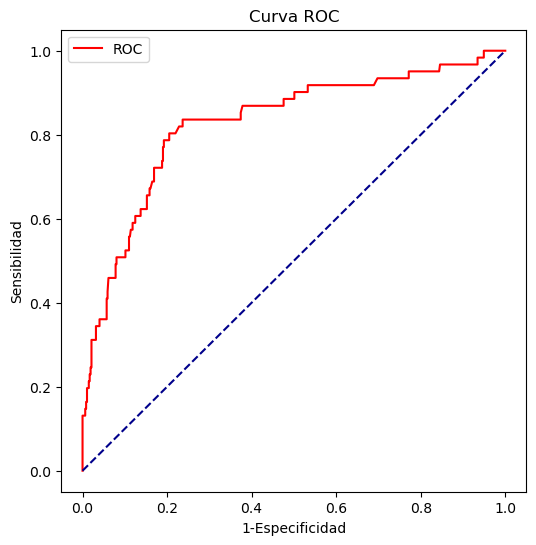

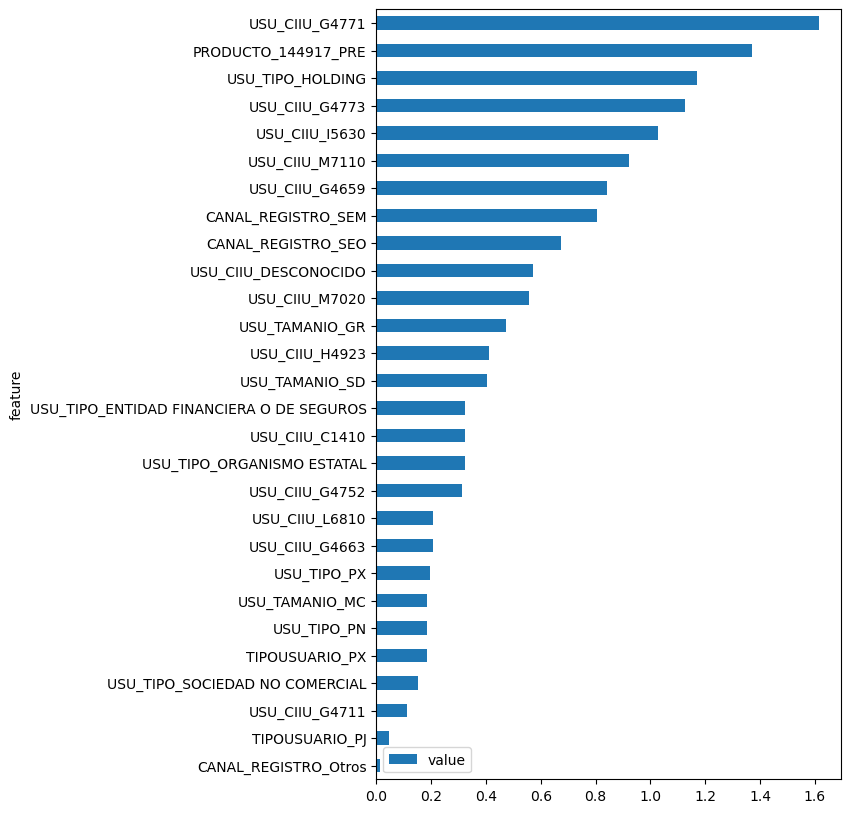

In [60]:
#Creamos un modelo de regresión logistica
modelo_RL = LogisticRegression(random_state=42)
tec_resample.append('Regressión Logistica')

modelling(modelo_RL, X_train, y_train, X_test, y_test)

importance = modelo_RL.coef_[0]

mostrar_atributos_relevantes(importance)

Observamos que el modelo es capaz de clasificar correctamente el 97% la clase 0 (clientes compra puntual), y menor capacidad para clasificar la clase 1 (31%) (clientes compra bonos y suscripciones) que son los que nos interesa.

#### Random Forest Classifier

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       473
         1.0       0.38      0.33      0.35        61

    accuracy                           0.86       534
   macro avg       0.65      0.63      0.64       534
weighted avg       0.85      0.86      0.86       534



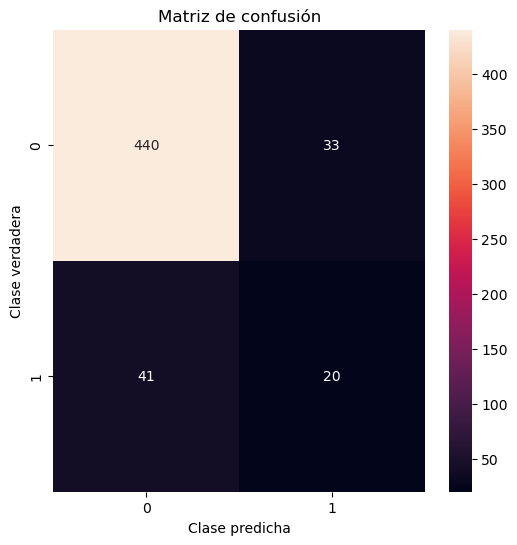

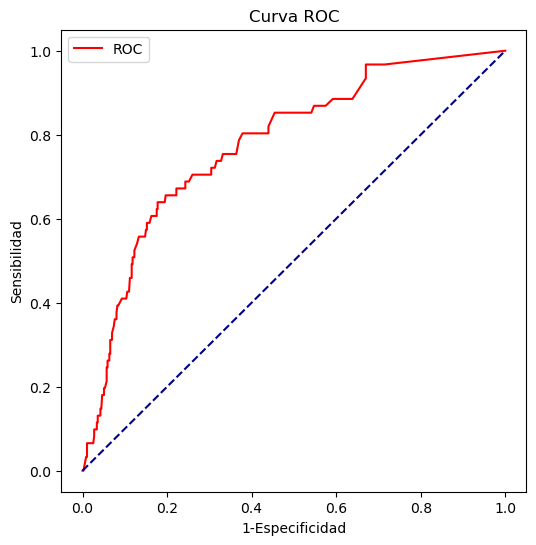

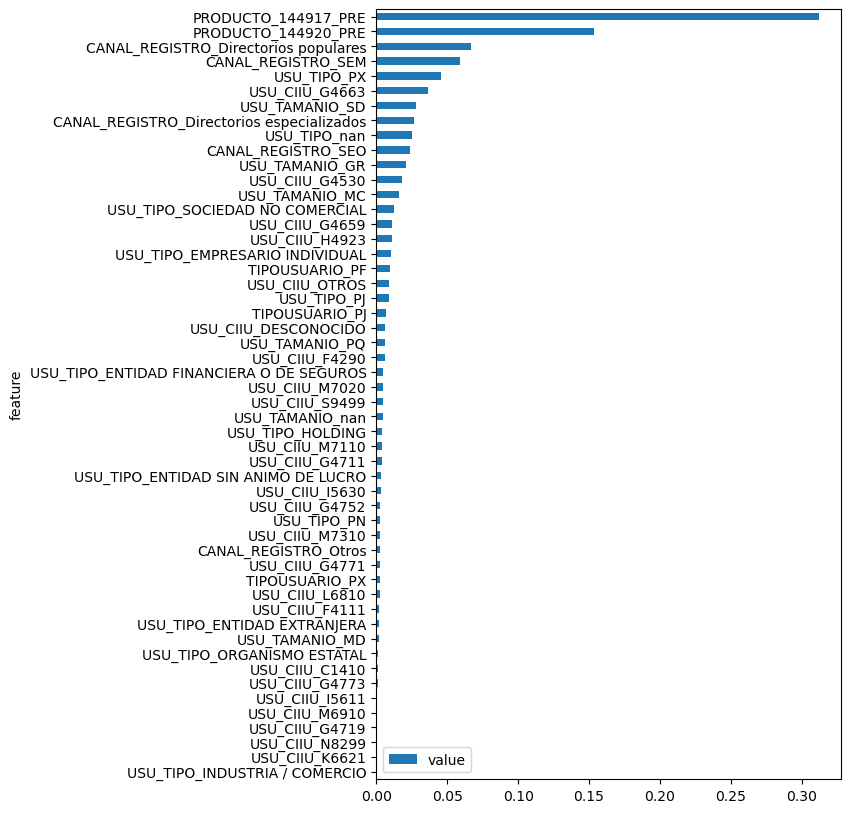

In [61]:
#Creamos un modelo Random Forest
modelo_RF = RandomForestClassifier(random_state=42)
tec_resample.append('Random Forest')

modelling(modelo_RF, X_train, y_train, X_test, y_test)

importance = modelo_RF.feature_importances_

mostrar_atributos_relevantes(importance)

En el modelo Random Forest, a pesar de que tiene mejor pinta la curva ROC que los árboles de decisión, los resultados obtenidos son peores que en el modelo de regresión logistica, ya que tiene menos capacidad para detectar y clasificar la clase 1 (clientes compra bonos y suscripciones).

#### Graddient Boosting Classifier

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93       473
         1.0       0.45      0.64      0.53        61

    accuracy                           0.87       534
   macro avg       0.70      0.77      0.73       534
weighted avg       0.89      0.87      0.88       534



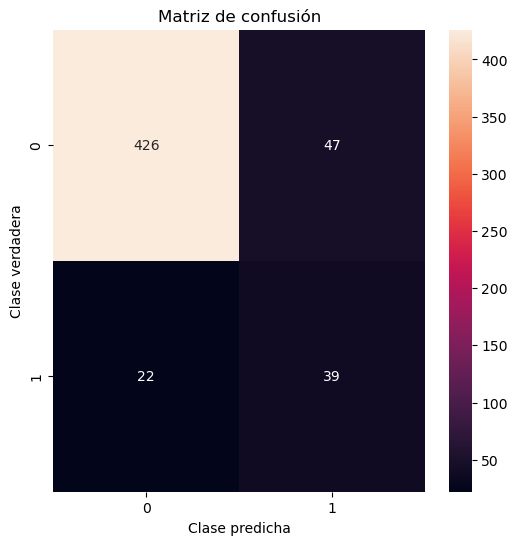

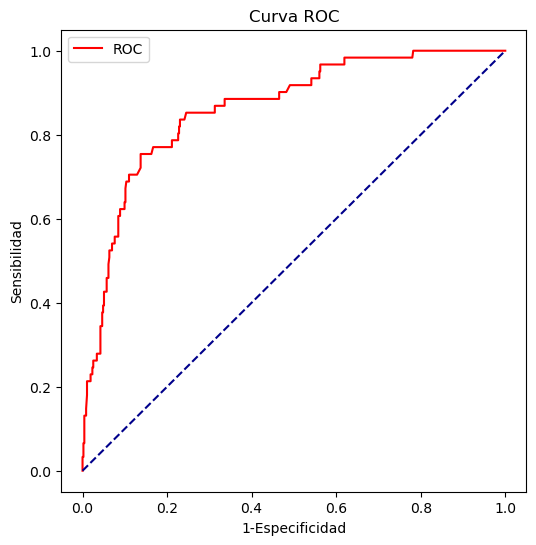

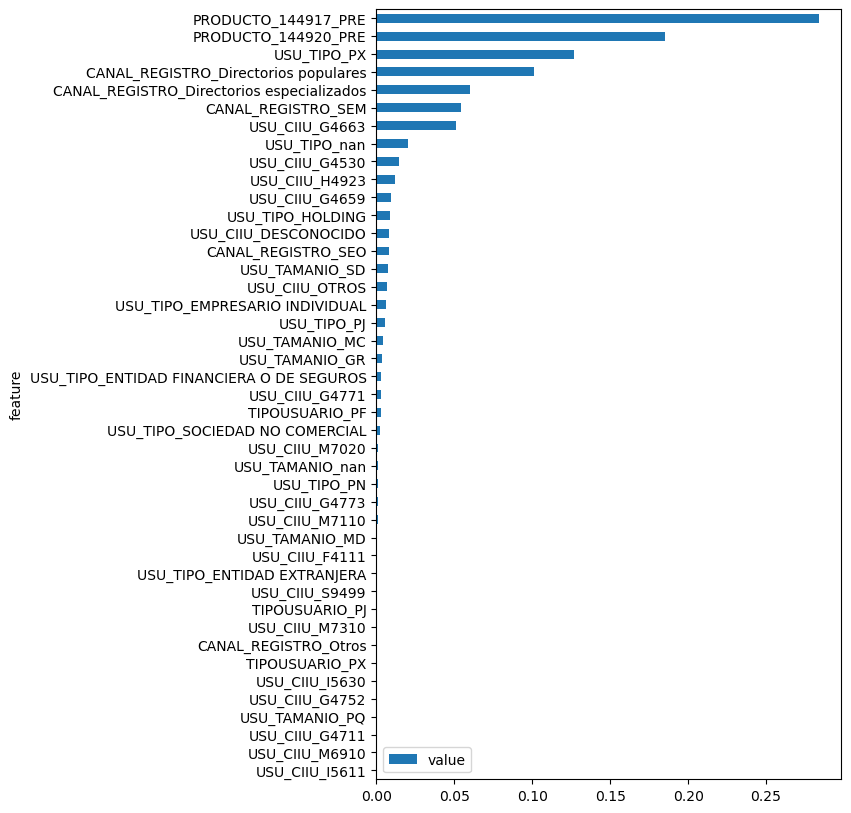

In [62]:
#Creamos un modelo Graddient Boosting Classifier
modelo_GBC = GradientBoostingClassifier(random_state=42)
tec_resample.append('Gradient Boosting Classifier')

modelling(modelo_GBC, X_train, y_train, X_test, y_test)

importance = modelo_GBC.feature_importances_

mostrar_atributos_relevantes(importance)

Podemos observar que el modelo Gradient Boosting mejora ligeramente a la hora de clasificar respecto a los la regresión logística y Random Forest.

#### Support Vector Machine (SVM)

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       473
         1.0       0.29      0.79      0.42        61

    accuracy                           0.75       534
   macro avg       0.63      0.77      0.63       534
weighted avg       0.89      0.75      0.79       534



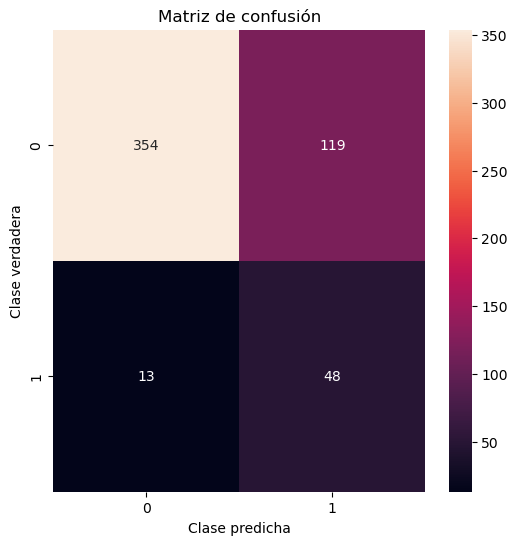

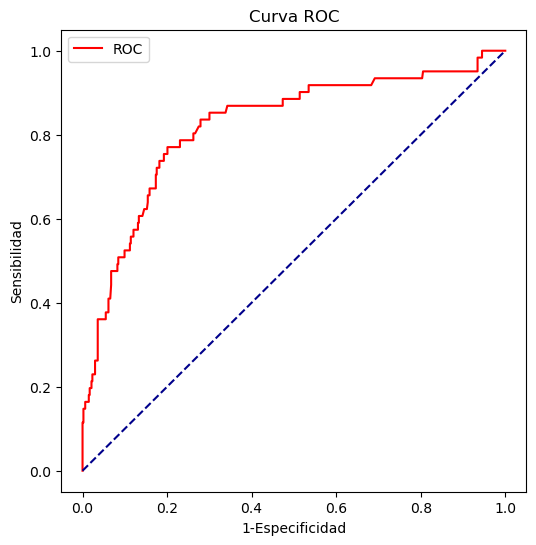

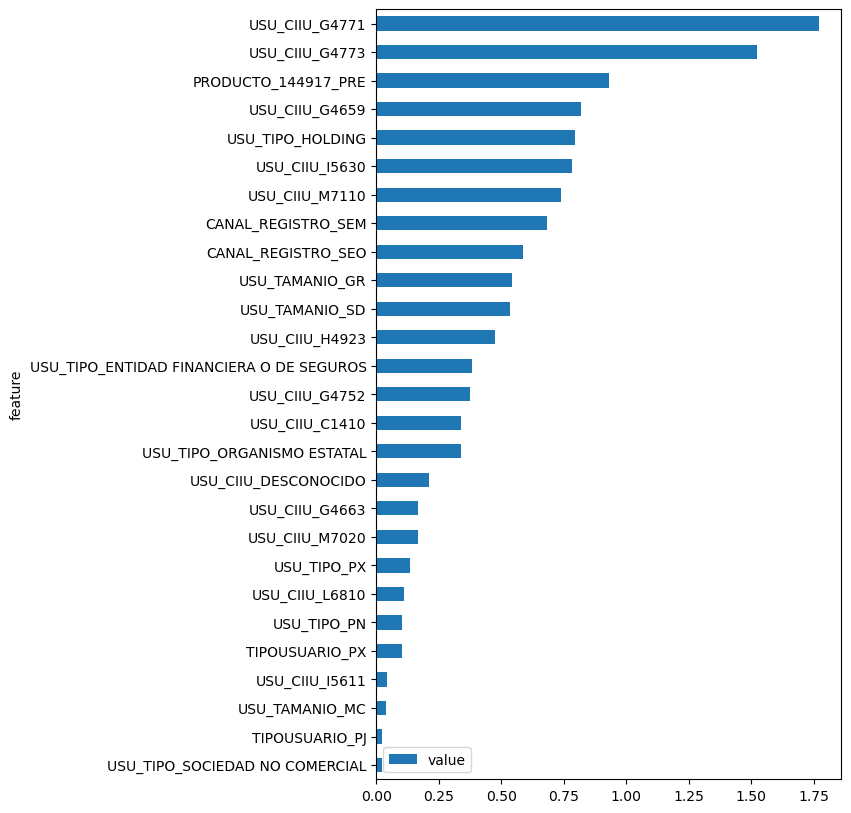

In [63]:
#Creamos un modelo SVM
modelo_SVM = SVC(kernel = 'linear', probability=True, random_state=42)
tec_resample.append('SVM')

modelling(modelo_SVM, X_train, y_train, X_test, y_test)

importance = modelo_SVM.coef_[0]

mostrar_atributos_relevantes(importance)

Podemos ver, que el modelo SVM obtiene muy buenos resultados, ya que tiene mayor capacidad identificar la clase 1 (79%) (clientes compra bonos y suscripciones) que son los que nos interesa.

#### Comparación modelos

In [64]:
#Comparamos los resultados de las metricas de los diferentos modelos
lista_metricas = [tec_resample, accuracy_res, precision_res, recall_res, f1score_res, auc_res]

metricas_results = pd.DataFrame (lista_metricas).transpose()
metricas_results.columns = ['Tecnica', 'Accuracy', 'Precision','Recall','F1-Score','AUC']

metricas_results

,Tecnica,Accuracy,Precision,Recall,F1-Score,AUC
0,Regressión Logistica,0.771536,0.310559,0.819672,0.45045,0.7925
1,Random Forest,0.861423,0.377358,0.327869,0.350877,0.629051
2,Gradient Boosting Classifier,0.870787,0.453488,0.639344,0.530612,0.769989
3,SVM,0.752809,0.287425,0.786885,0.421053,0.76765


Observando los resultados obtenidos entre los diferentes modelos, podemos ver que los mejores modelos son la Regresión Logística y el SVM. En este caso, entrenaremos un modelo de regresion logística, ya que es el que mejor resultado nos ha dado.

#### Modelo final

Finalmente, escogemos el modelo de regresión logistica, lo entrenamos, y aplicamos la validación cruzada.

In [65]:
modelo_final = LogisticRegression(random_state=42)

'''
parametros = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1]
    
}
grid_search = GridSearchCV(modelo_final, parametros, scoring = 'roc_auc', n_jobs=5, cv=5)
grid_search.fit(X_train,y_train)

print("Mejor combinación de hiperparametros: ",grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)
'''

score_val_res = cross_val_score(modelo_final, X_train, y_train, scoring="f1", cv = 5)
print(score_val_res)
print("Media: ", score_val_res.mean())
print("Desviación standard: ", score_val_res.std())

[0.73251029 0.75844156 0.75668449 0.76923077 0.75733333]
Media:  0.7548400882100228
Desviación standard:  0.012068971447931995
